# Load the LGMR data (mean of the ensemble)

In [32]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_climo.nc')
ds_sat

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
Data variables:
    sat      (age, lat, lon) float32 ...
    sat_std  (age, lat, lon) float32 ...

# Crop the data for age>11

In [33]:

# ds_sat = ds_sat.where(ds_sat.age>=11000, drop=True)

ds_sat = ds_sat.where(ds_sat.age>=14000, drop=True)

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


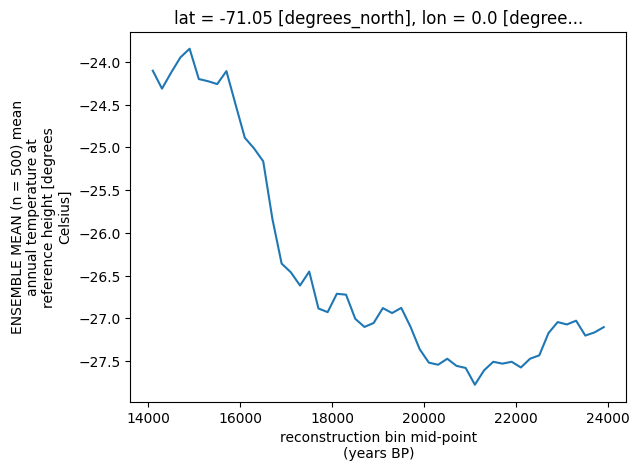

In [34]:
ds_sat['sat'].isel(lat=10).isel(lon=0).plot()

# Center and weight the data

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (50, 13824)


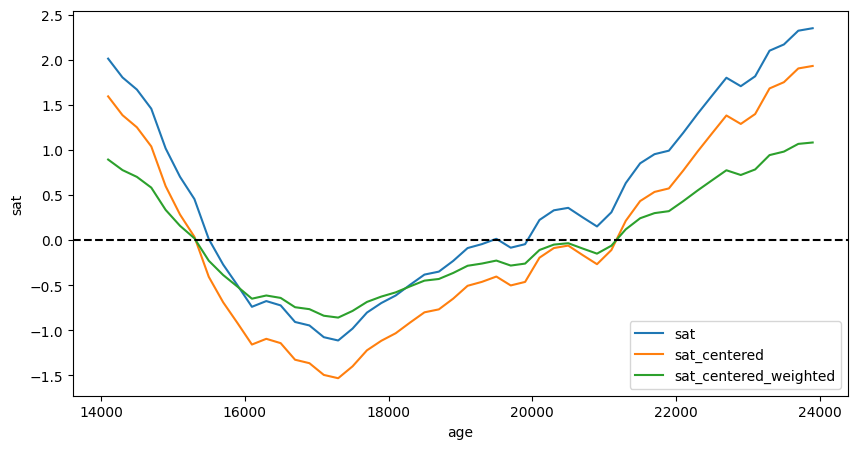

In [35]:
from toolbox import PCA_functions as pf
# 1. Center the Data
ds_sat = pf.center_data(ds_sat)

# 2. Weight the Data
ds_sat = pf.apply_weighting(ds_sat)

# 3. Plot the Centered and Weighted Data
lat_index = 77
lon_index = 90
pf.plot_sat_variables(ds_sat, lat_index, lon_index)


# PCA

In [36]:
from toolbox import PCA_functions as pf
import importlib
importlib.reload(pf)
# 4. Perform PCA
exp_v_climo, eofs_climo, pcs_climo = pf.sat_PCA(ds_sat)
print('Explained variance:', exp_v_climo)

shape of the reshaped sat_centered_weighted: (13824, 50)
shape of u, s, vh: (13824, 13824) (50,) (50, 50)
shape of EOFs: (13824, 2)
shape of PCs: (50, 2)
Explained variance: [6.9087273e-01 2.7686661e-01 1.4081990e-02 7.9770917e-03 3.7492465e-03
 2.0848040e-03 1.2548419e-03 7.8027707e-04 6.3050387e-04 3.6273419e-04
 3.2023349e-04 2.5993100e-04 2.0234540e-04 1.2076710e-04 8.4889398e-05
 7.0630638e-05 5.5111501e-05 4.4573597e-05 3.6388890e-05 3.0430276e-05
 2.5678864e-05 1.8224862e-05 1.3789796e-05 1.0624692e-05 9.5944742e-06
 7.7527002e-06 5.0980052e-06 3.8973726e-06 2.7266960e-06 2.5073728e-06
 2.1428336e-06 1.8861168e-06 1.7020600e-06 1.3982584e-06 1.1953463e-06
 1.0817608e-06 8.9914471e-07 6.6980419e-07 6.2356241e-07 4.9549550e-07
 4.2556047e-07 3.4099696e-07 3.0148908e-07 2.5093971e-07 1.8639047e-07
 1.3638802e-07 1.1958207e-07 8.1747586e-08 6.7086553e-08 2.9113140e-12]


# Plot PCA result

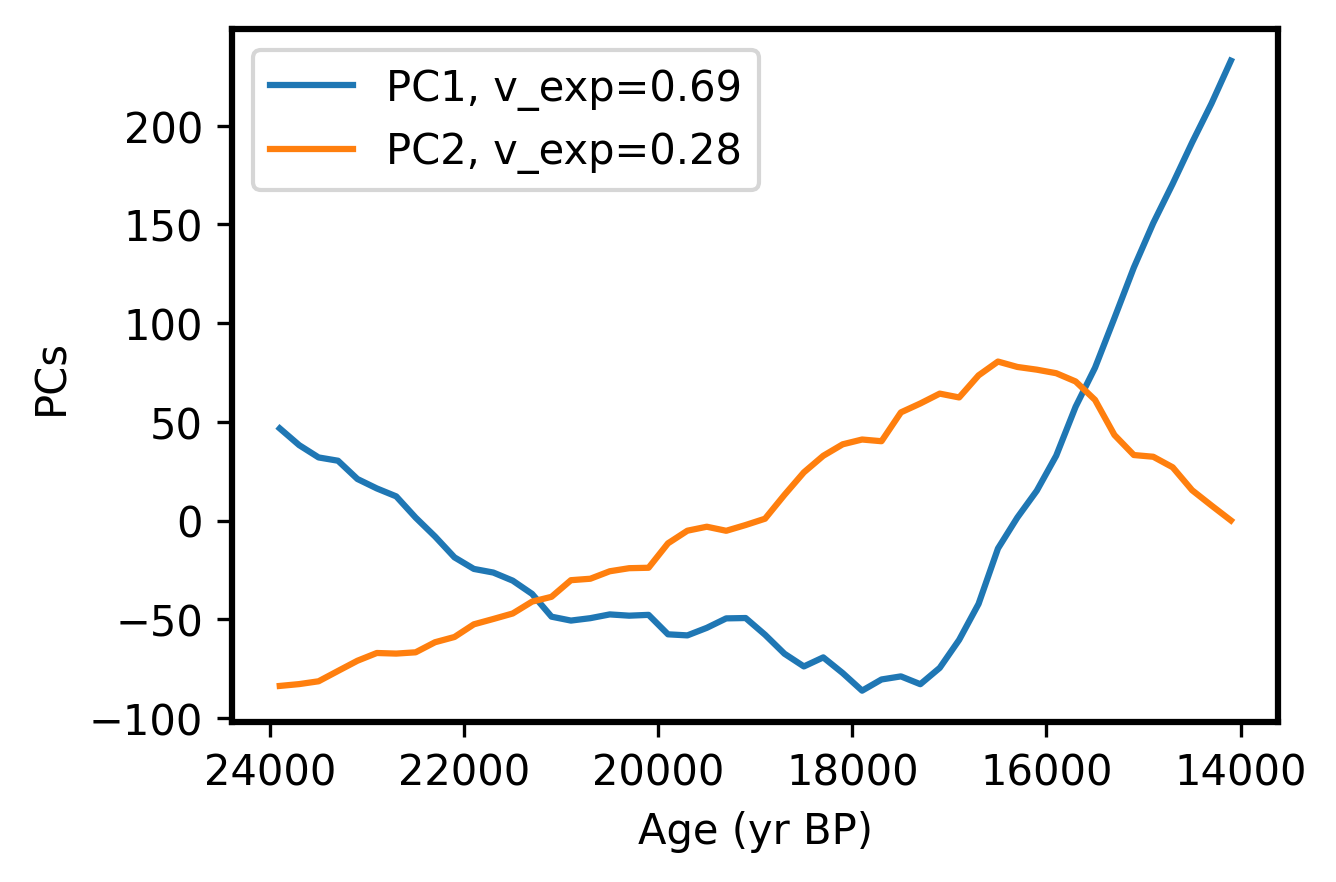

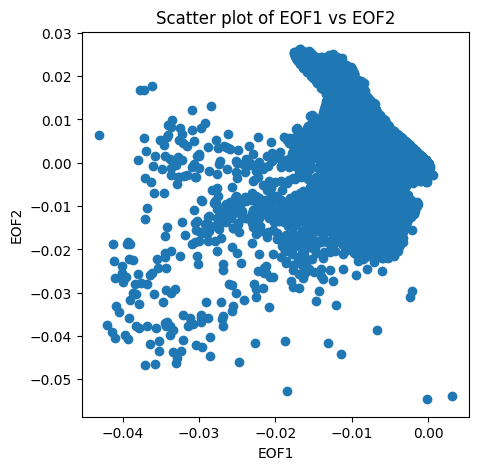

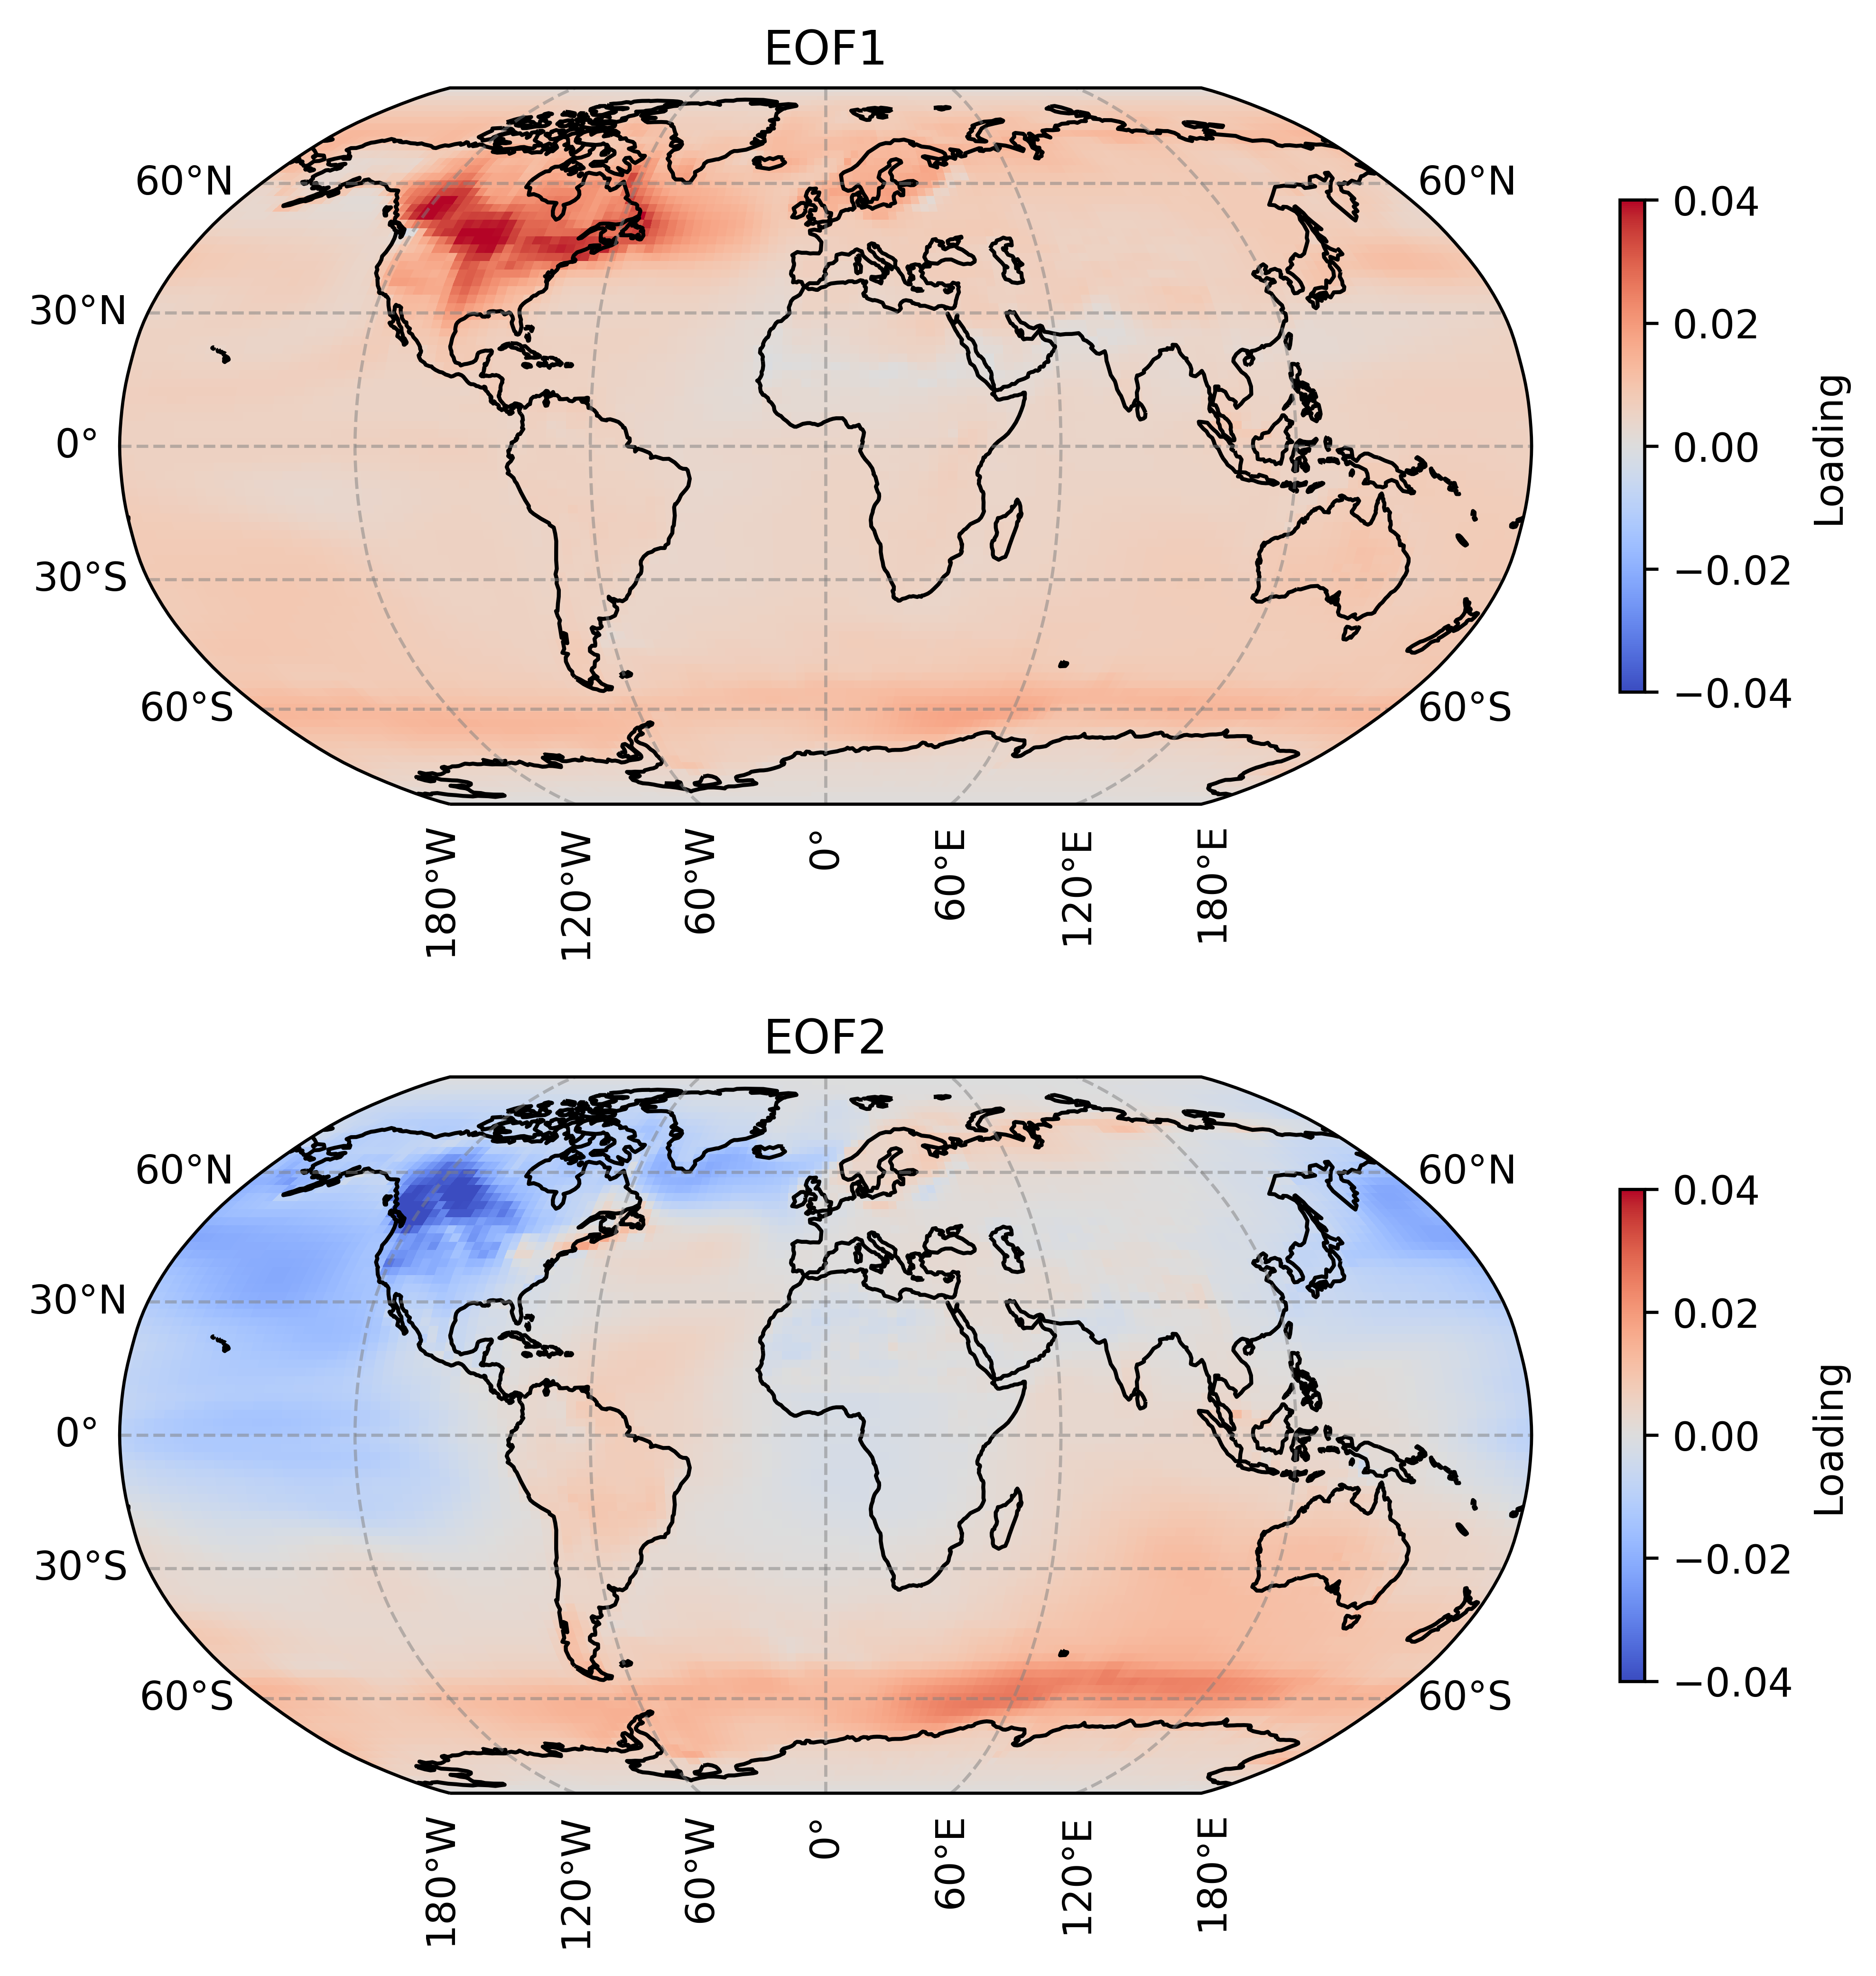

In [37]:
from toolbox import PCA_functions as pf
import importlib
importlib.reload(pf)

# 5. Plot pcs_climo
fig_pc,ax=pf.plot_pcs(ds_sat['age'].values, pcs_climo, exp_v_climo)

# 6. Plot EOF Scatter
pf.plot_eof_scatter(eofs_climo)

# 7. Plot the EOF Map
fig_eof,axs=pf.plot_eof_map(eofs_climo, ds_sat['lat'].values, ds_sat['lon'].values)

# Save figure

In [ ]:
output_path = 'D:/VScode/Last_deglaciation/fig_exp_temp/'
fig_pc.savefig(output_path+'/PC_crop_at_14.svg', format='svg', dpi=600,bbox_inches='tight')

In [46]:
output_path = 'D:/VScode/Last_deglaciation/fig_exp_temp/'
fig_eof.savefig(output_path+'/LGMR_mean_eof.svg', format='svg', dpi=600,bbox_inches='tight')

# Save the exp_v, eofs_climo and pcs_climo

In [7]:
# save exp_v_climo, eofs_climo, pcs
import pickle
pickle.dump(exp_v_climo, open('climo_ana_data/exp_v_climo.pkl', 'wb'))
pickle.dump(eofs_climo, open('climo_ana_data/eofs_climo.pkl', 'wb'))
pickle.dump(pcs_climo, open('climo_ana_data/pcs_climo.pkl', 'wb'))

In [8]:
# load exp_v_climo, eofs_climo, pcs
import pickle
exp_v_climo = pickle.load(open('climo_ana_data/exp_v_climo.pkl', 'rb'))
eofs_climo = pickle.load(open('climo_ana_data/eofs_climo.pkl', 'rb'))
pcs_climo = pickle.load(open('climo_ana_data/pcs_climo.pkl', 'rb'))

# PCA, using sklearn

shape of the reshaped sat_centered_weighted: (65, 13824)
shape of PCs: (65, 2)
Explained variance: [0.8982588  0.08048404]
shape of EOFs: (13824, 2)
Explained variance: [0.8982588  0.08048404]


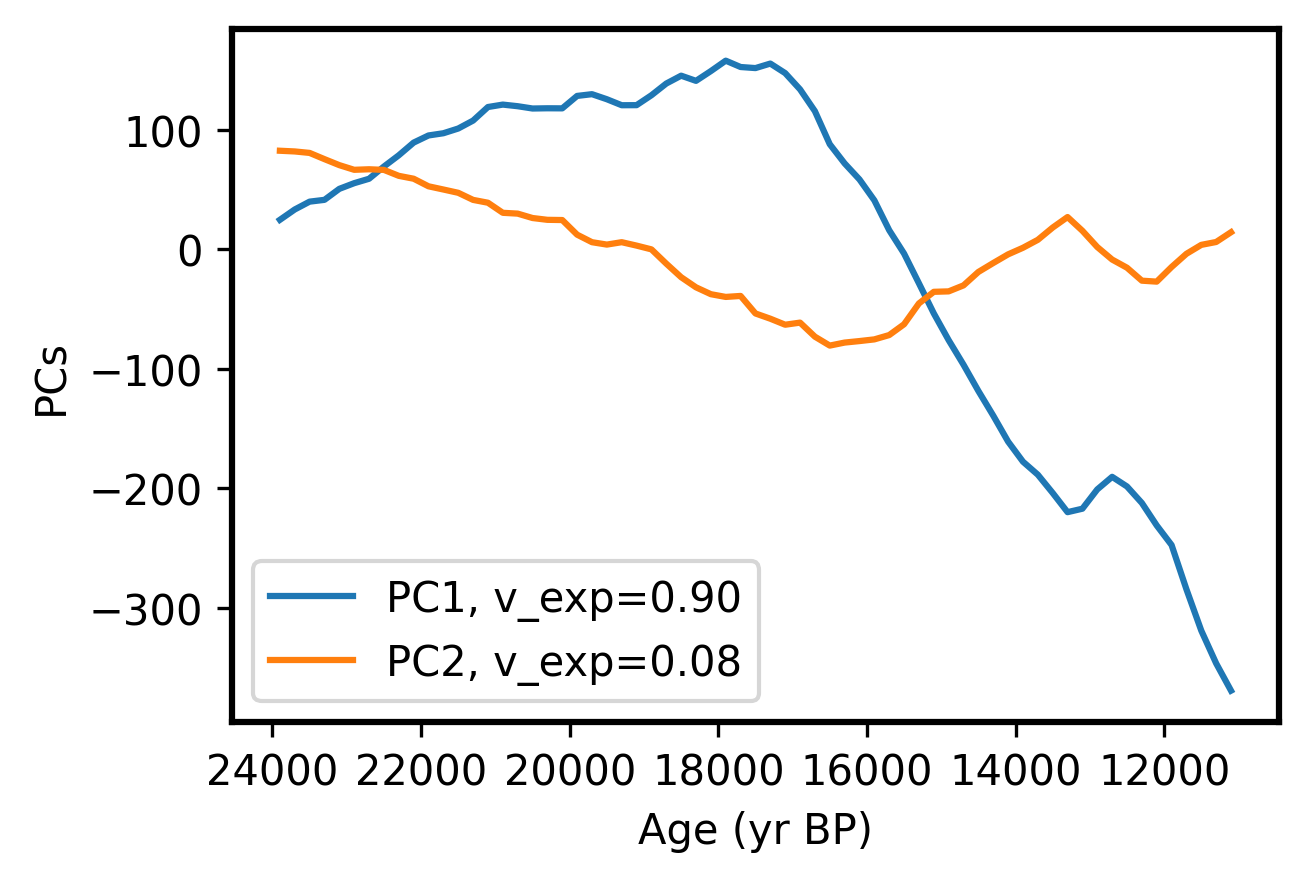

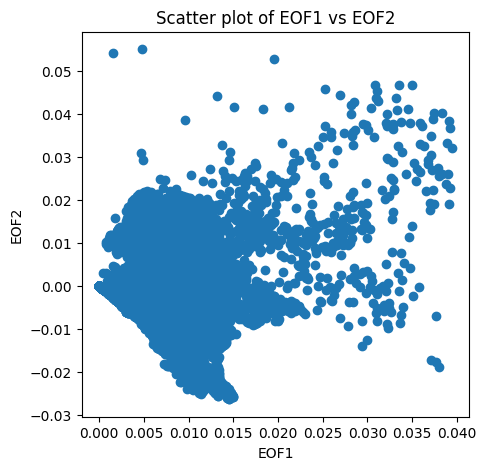

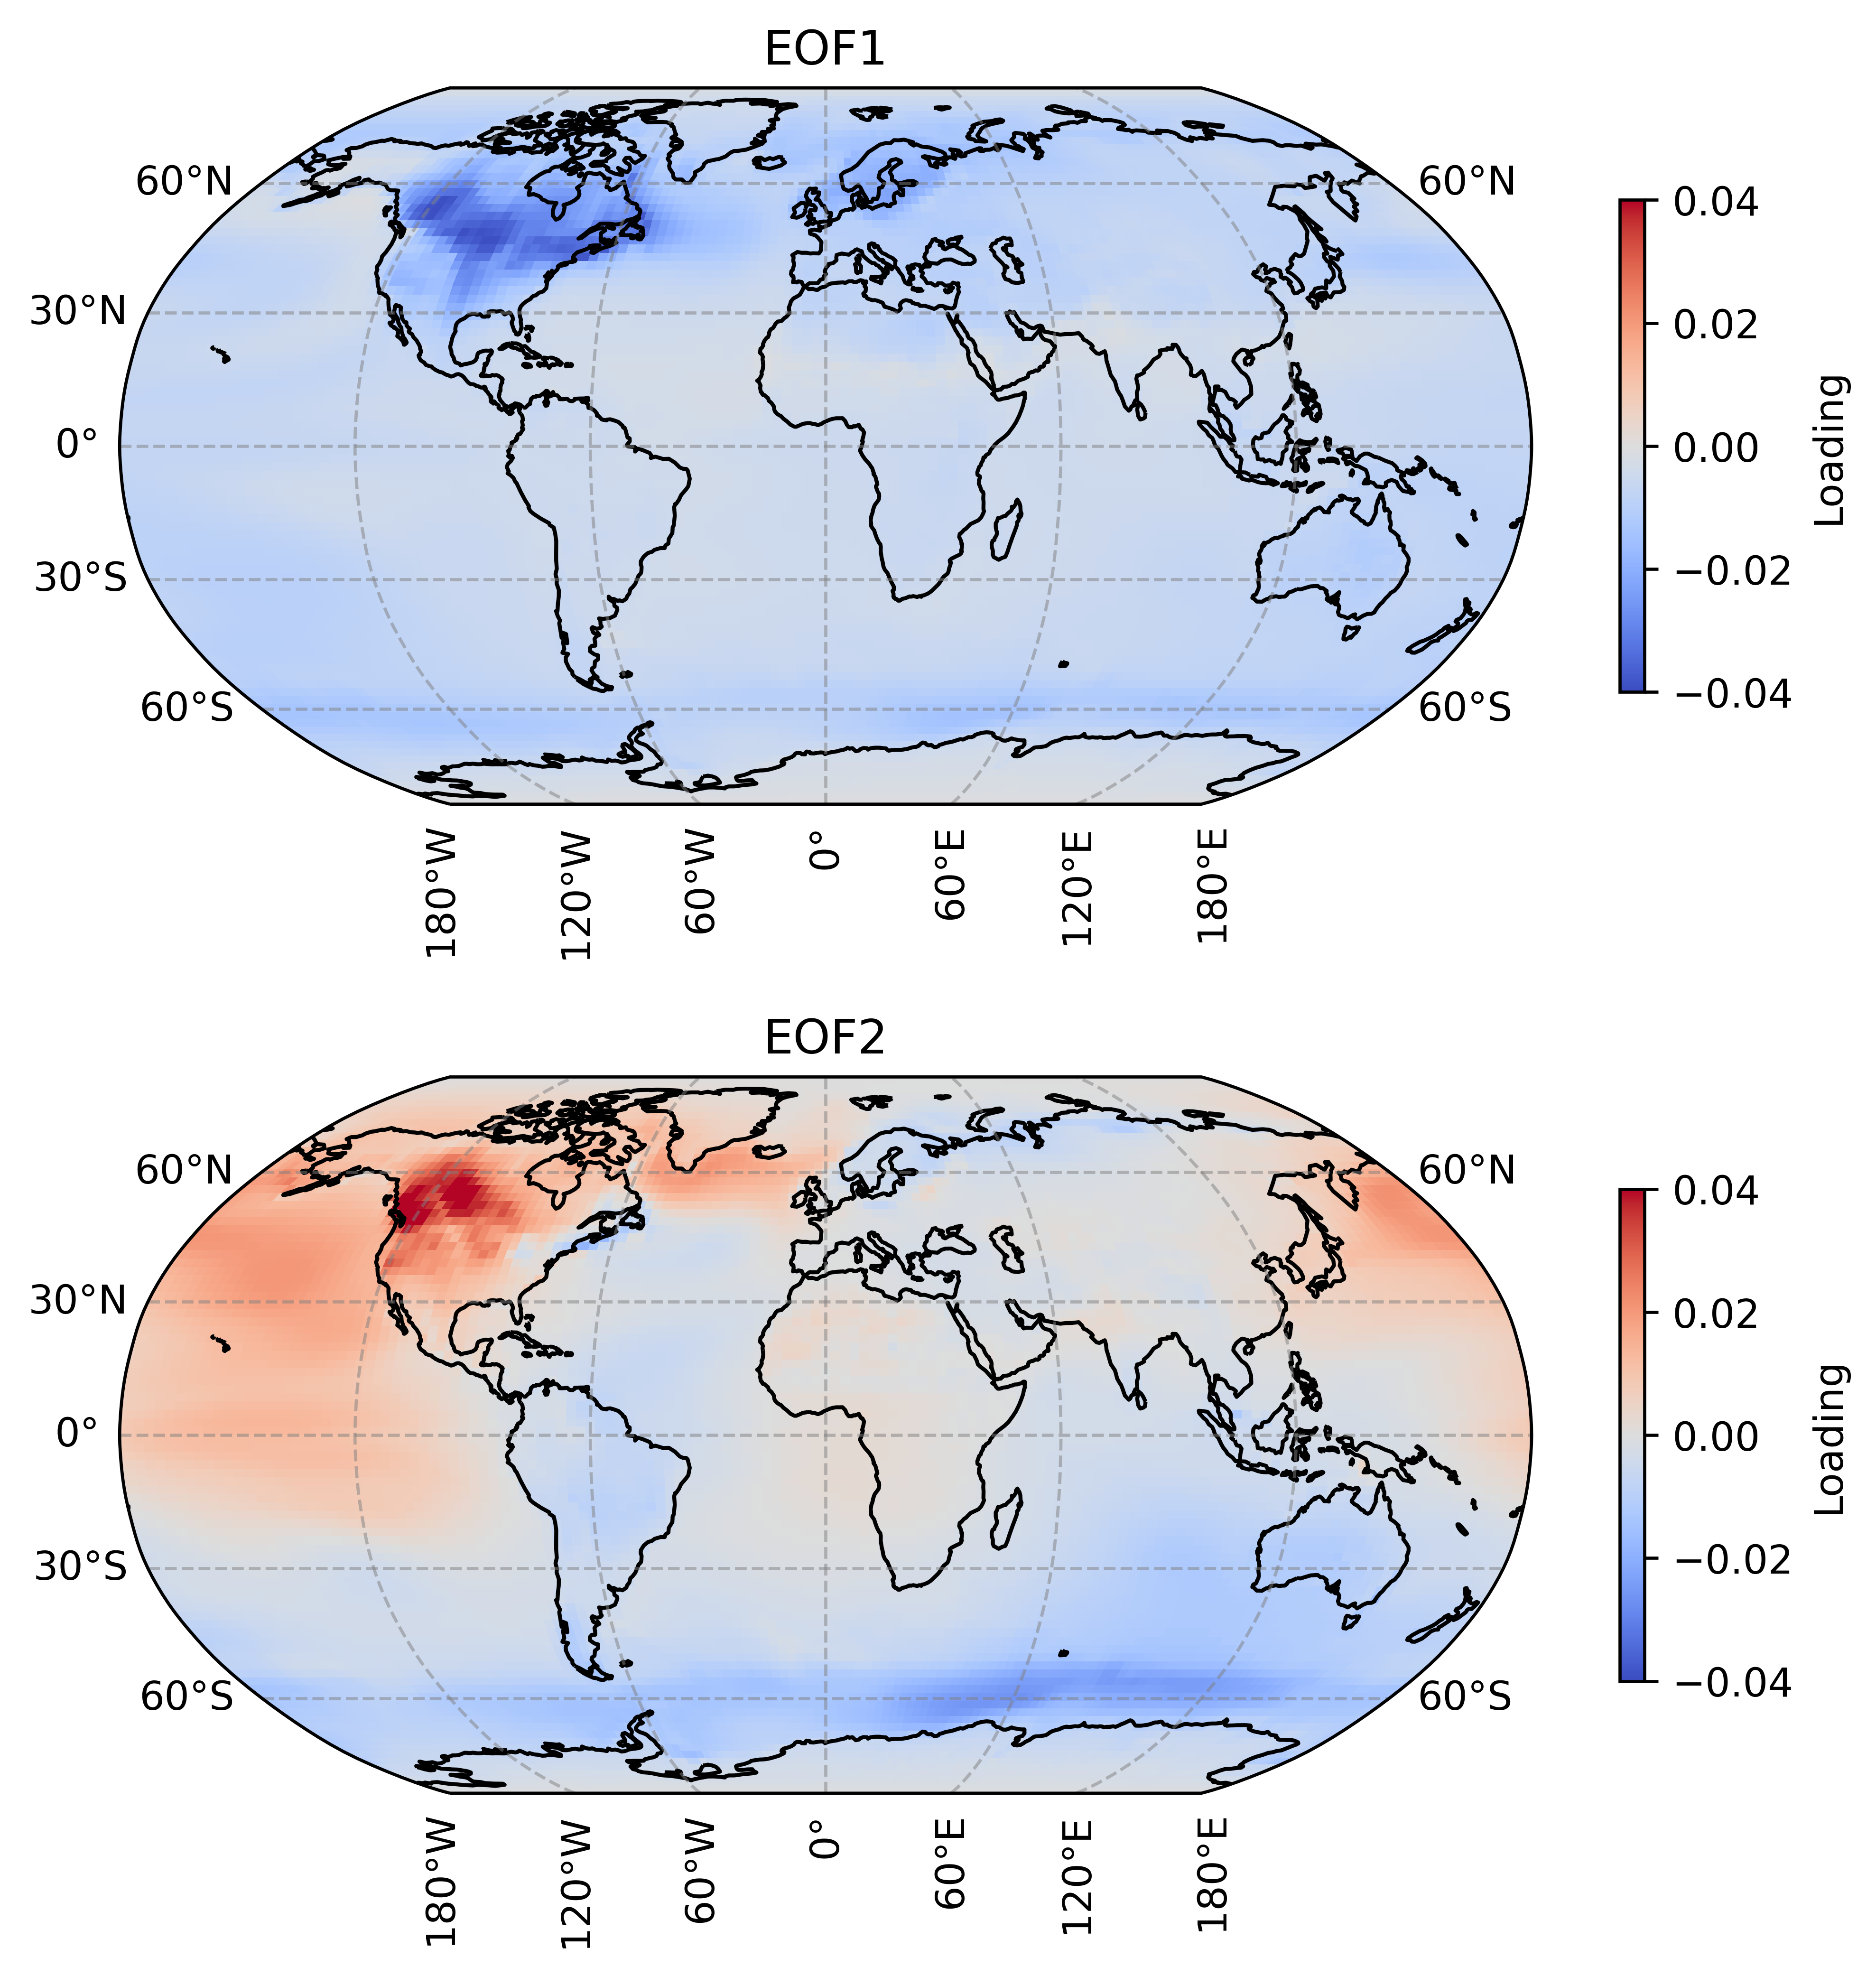

(<Figure size 4800x5400 with 4 Axes>,
 array([<GeoAxesSubplot: title={'center': 'EOF1'}>,
        <GeoAxesSubplot: title={'center': 'EOF2'}>], dtype=object))

In [30]:
from toolbox import PCA_functions as pf
# 4. Perform PCA
exp_v_climo_sk, eofs_climo_sk, pcs_climo_sk = pf.sat_PCA_sklearn(ds_sat)
print('Explained variance:', exp_v_climo_sk)

# Plot PCs
pf.plot_pcs(ds_sat['age'].values, pcs_climo_sk, exp_v_climo_sk)

# 6. Plot EOF Scatter
pf.plot_eof_scatter(eofs_climo_sk)

# 7. Plot the EOF Map
pf.plot_eof_map(eofs_climo_sk, ds_sat['lat'].values, ds_sat['lon'].values)

# Save the data

In [7]:
# save exp_v_climo_sk, eofs_climo_sk, pcs_climo_sk
import pickle
pickle.dump(exp_v_climo_sk, open('climo_ana_data/exp_v_climo_sk.pkl', 'wb'))
pickle.dump(eofs_climo_sk, open('climo_ana_data/eofs_climo_sk.pkl', 'wb'))
pickle.dump(pcs_climo_sk, open('climo_ana_data/pcs_climo_sk.pkl', 'wb'))

In [ ]:
# read exp_v_climo_sk, eofs_climo_sk, pcs_climo_sk
import pickle
exp_v_climo_sk = pickle.load(open('climo_ana_data/exp_v_climo_sk.pkl', 'rb'))
eofs_climo_sk = pickle.load(open('climo_ana_data/eofs_climo_sk.pkl', 'rb'))
pcs_climo_sk = pickle.load(open('climo_ana_data/pcs_climo_sk.pkl', 'rb'))

# GMM

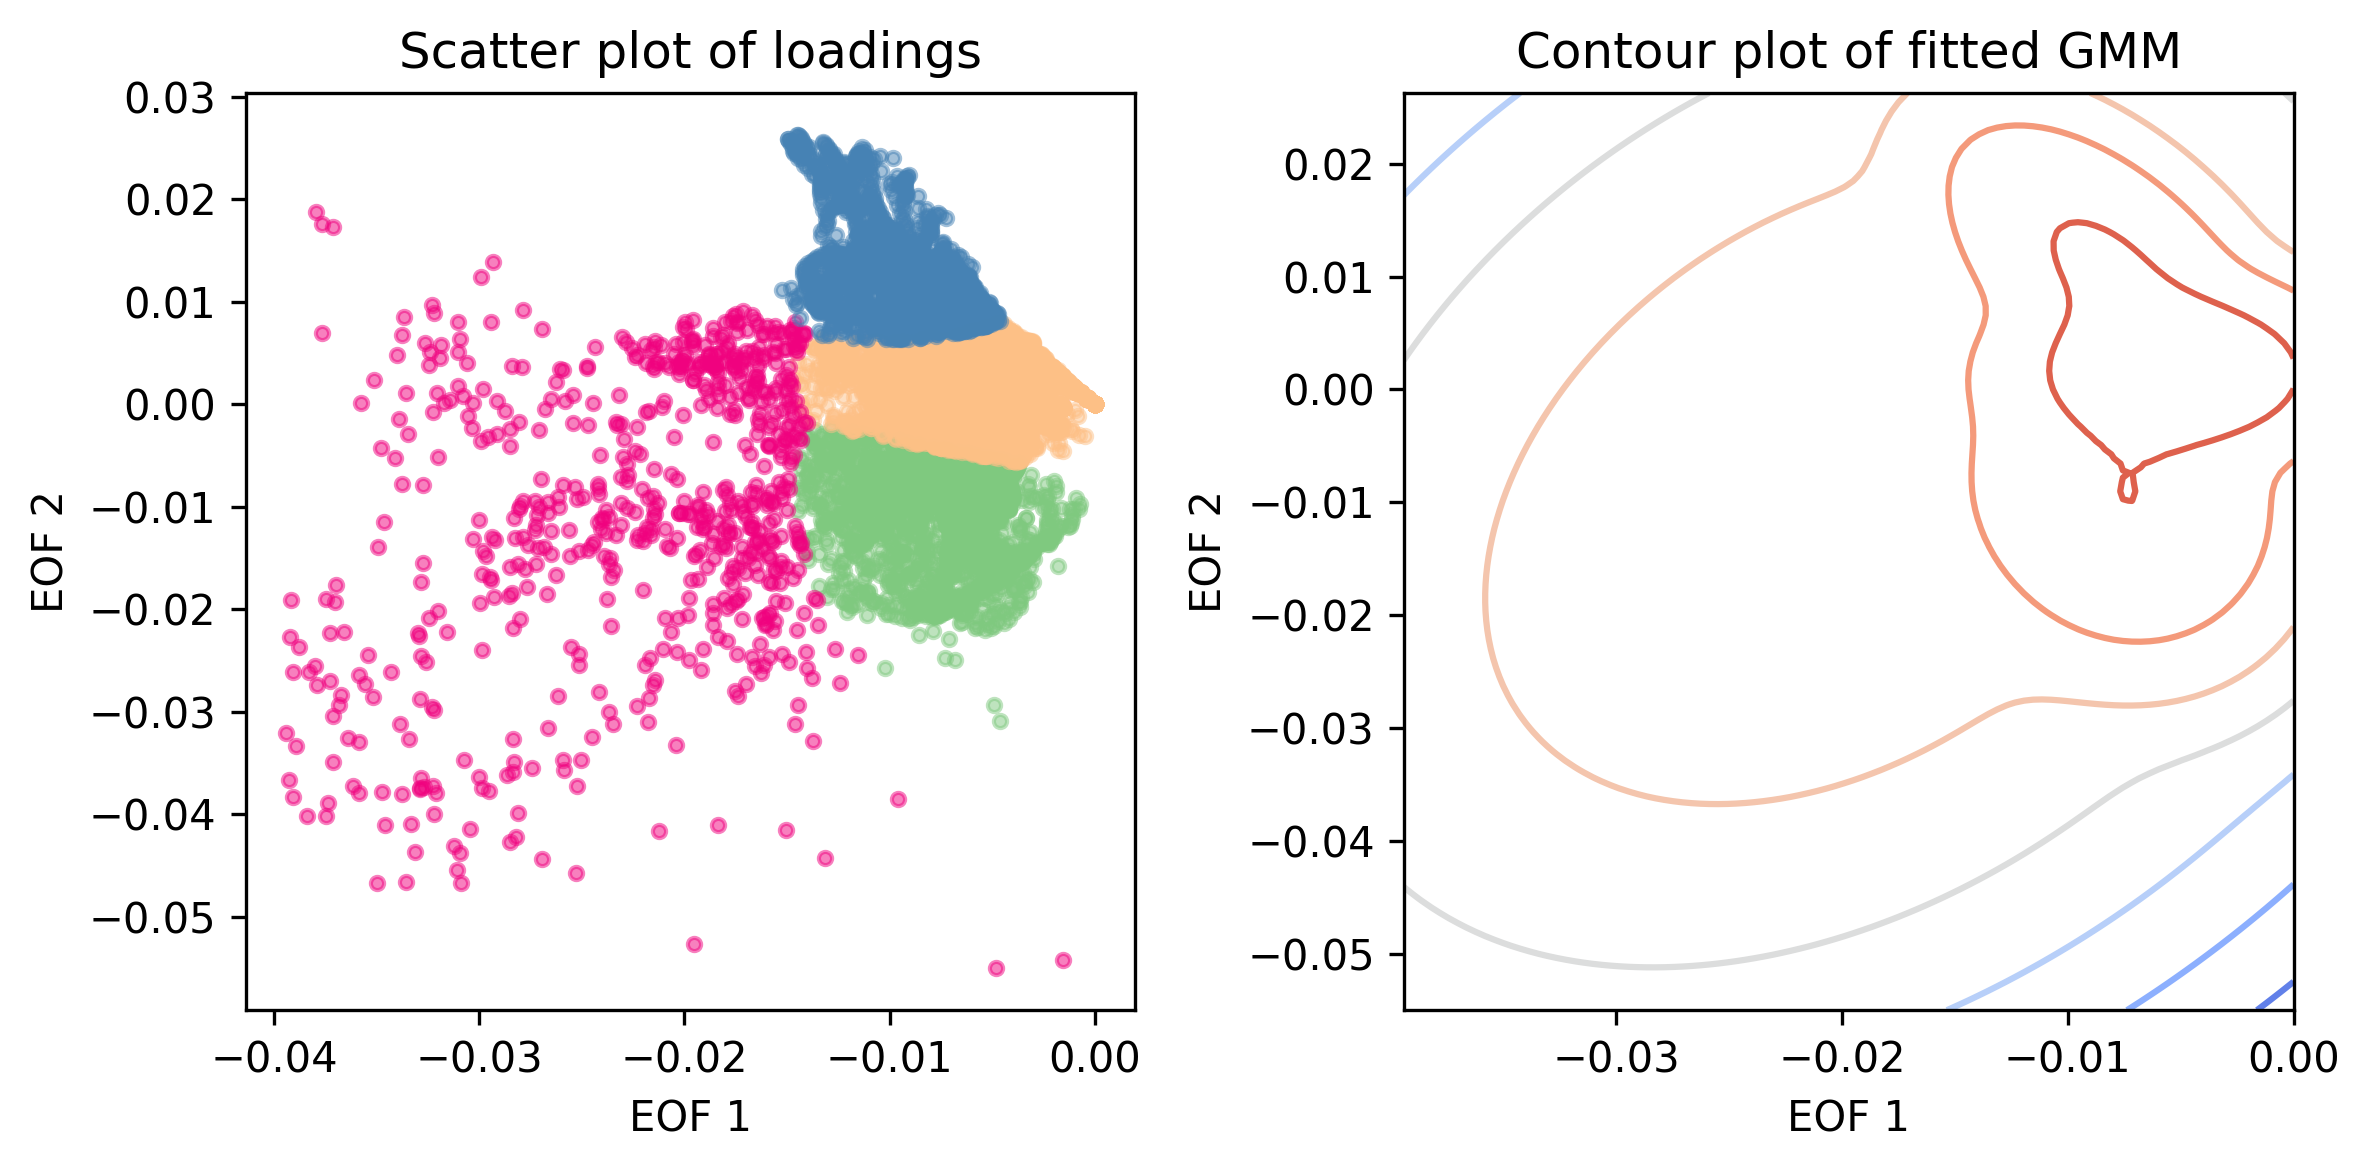

In [9]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf)

ds_GMM_climo=gf.GMM4EOFS(eofs_climo, ds_sat,n_components=4)

# Store the GMM results

In [10]:
# save the ds_EOFs_GMM
ds_GMM_climo.to_netcdf('climo_ana_data/ds_GMM_climo.nc')

In [11]:
# load the ds_EOFs_GMM
import xarray as xr
ds_GMM_climo = xr.open_dataset('climo_ana_data/ds_GMM_climo.nc')

# Plot the spatial distribution of labels

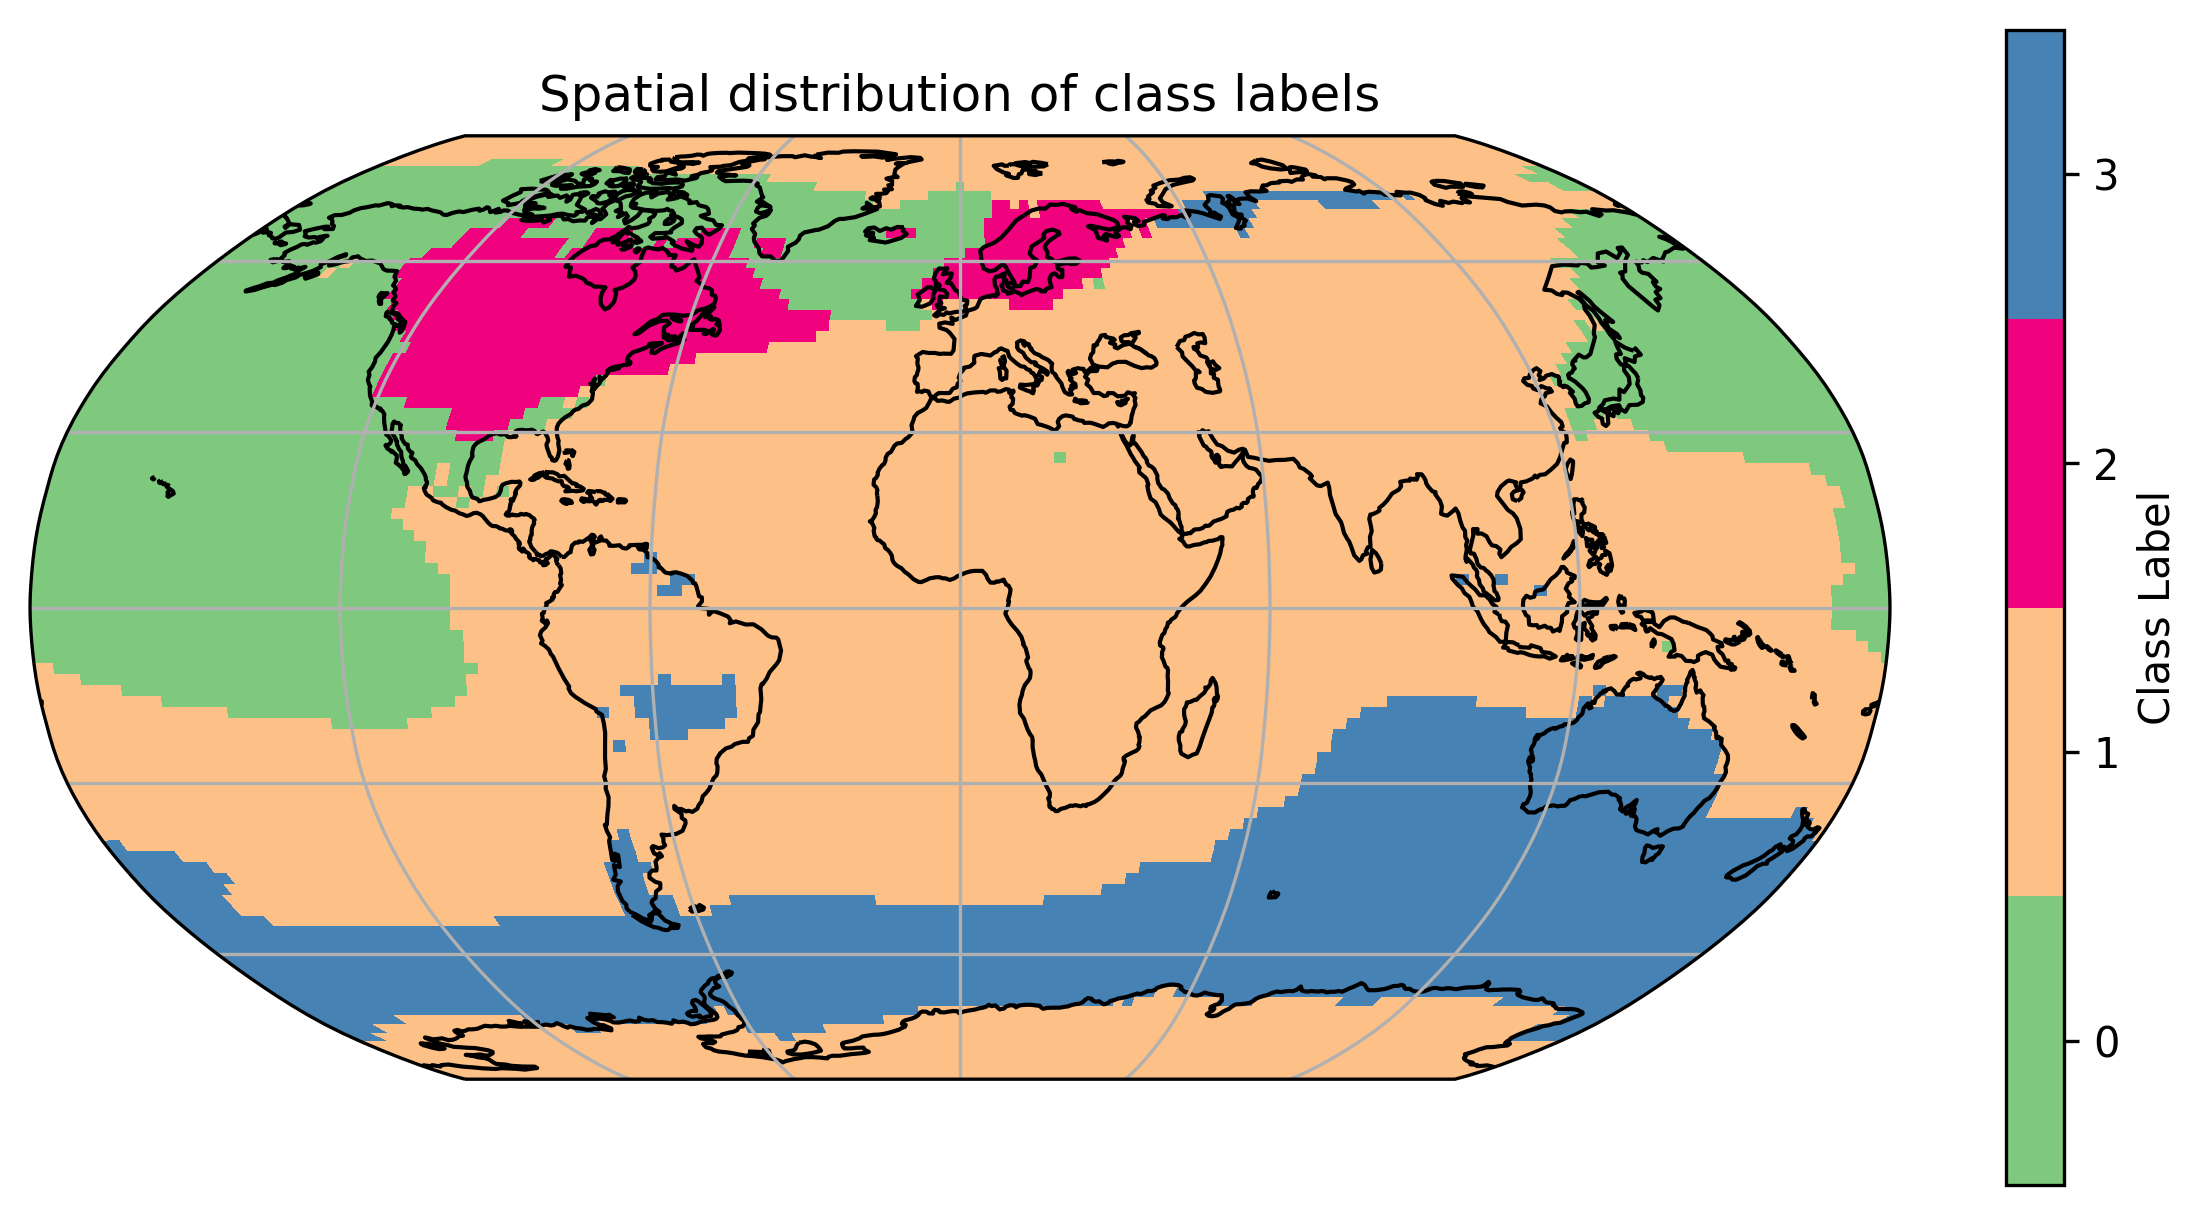

In [12]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf)

gf.plot_labels(ds_GMM_climo)

# Plot the weighted average curves

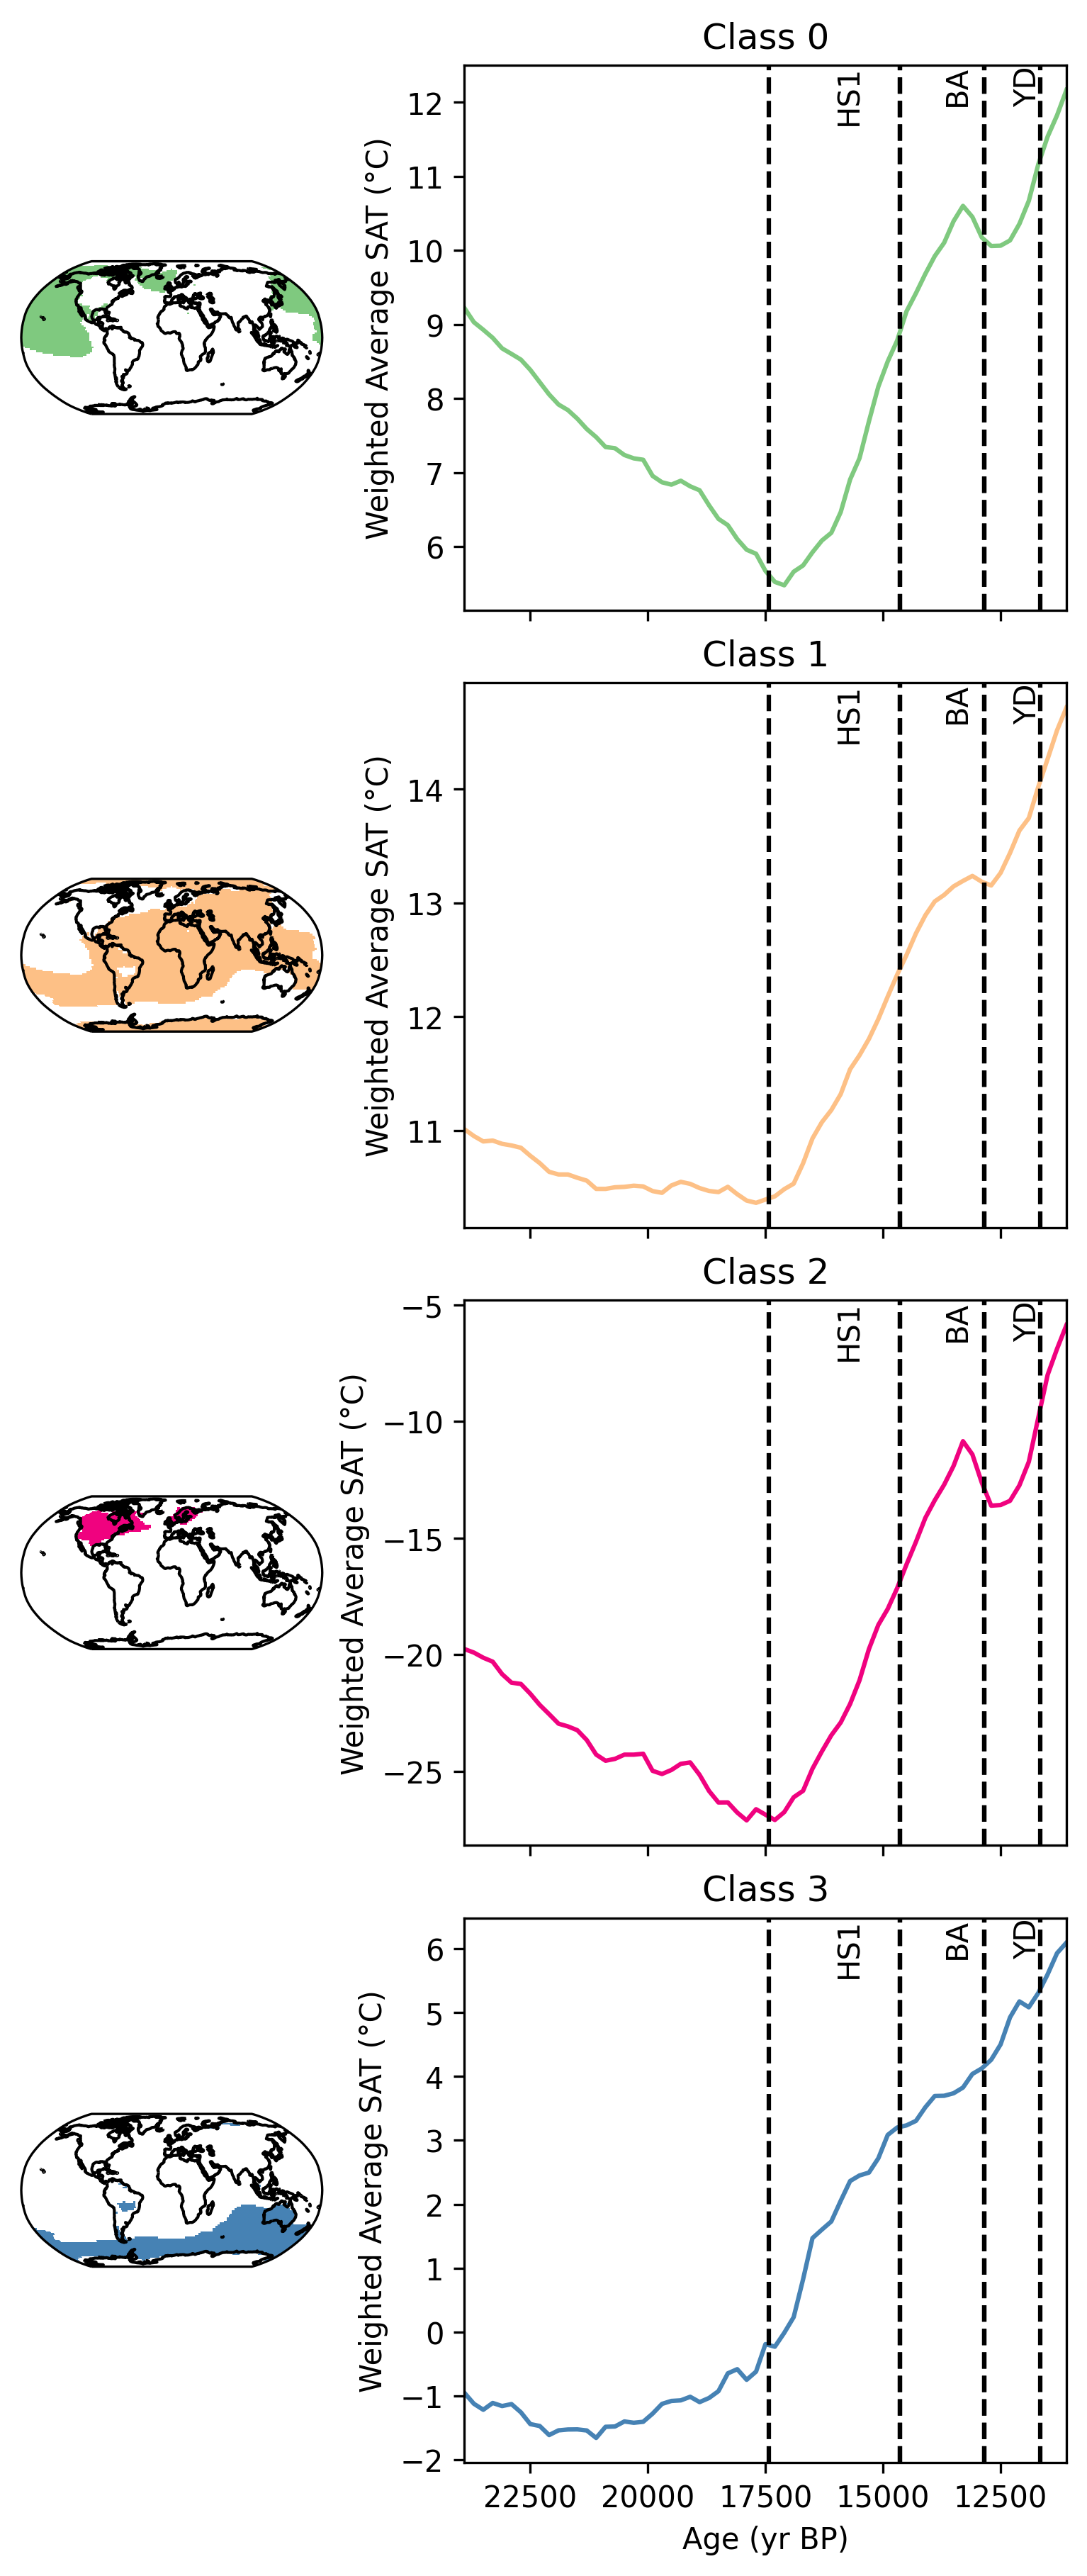

In [13]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf)

uncor_weighted_avg=gf.plot_weighted_average_curve(ds_GMM_climo.copy(), dpi=300)

In [14]:
# store the uncor_weighted_avg
import pickle
pickle.dump(uncor_weighted_avg, open('climo_ana_data/uncor_weighted_avg.pkl', 'wb'))

In [15]:
# load the uncor_weighted_avg
import pickle
uncor_weighted_avg = pickle.load(open('climo_ana_data/uncor_weighted_avg.pkl', 'rb'))

# Find change points

-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [16. 23. 34. 40. 48.]
selected_cp_index: 2
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [14. 29. 35. 51.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 43. 49.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 28. 32. 37. 45.]
selected_cp_index: 0


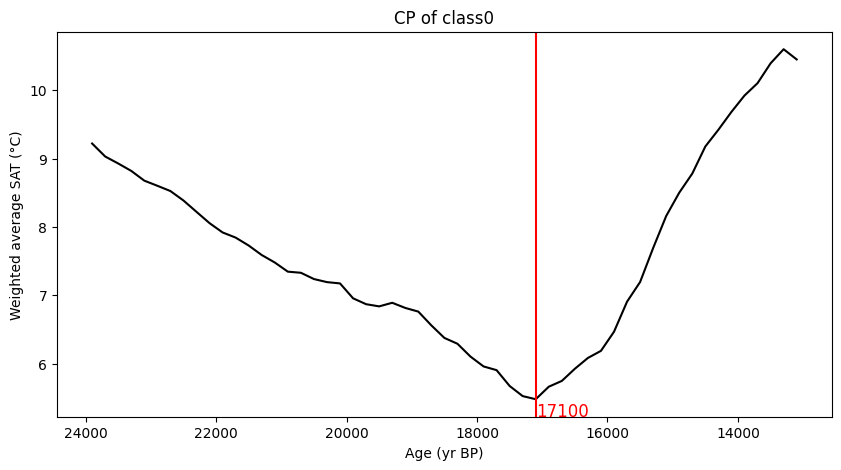

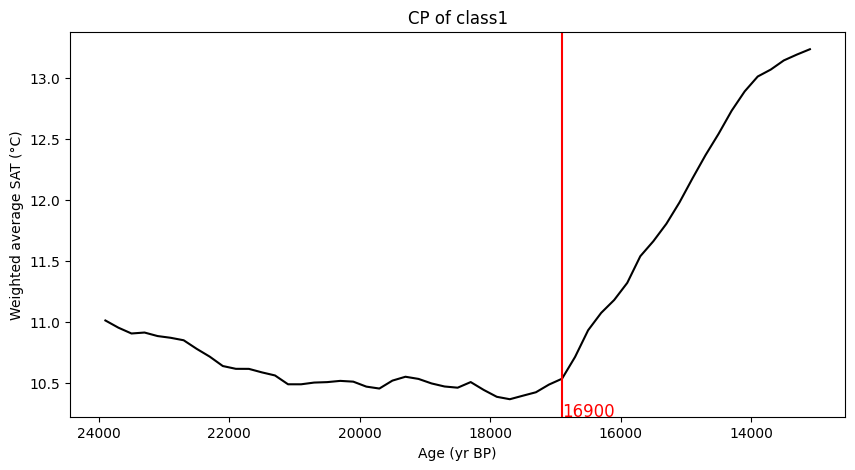

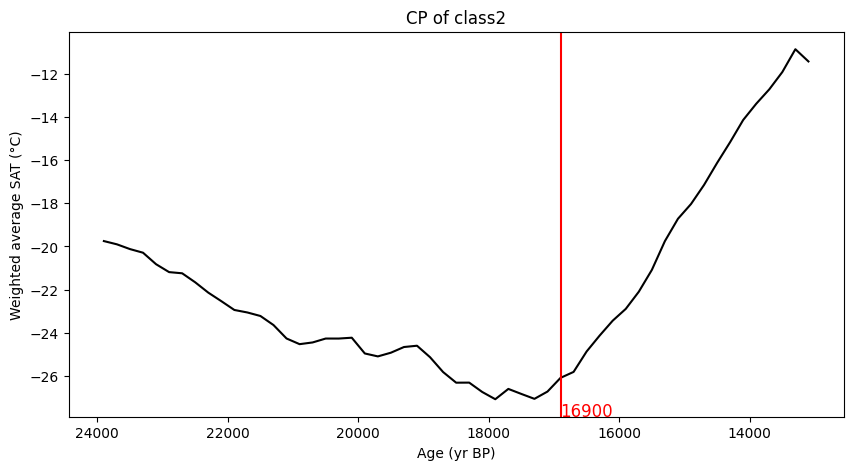

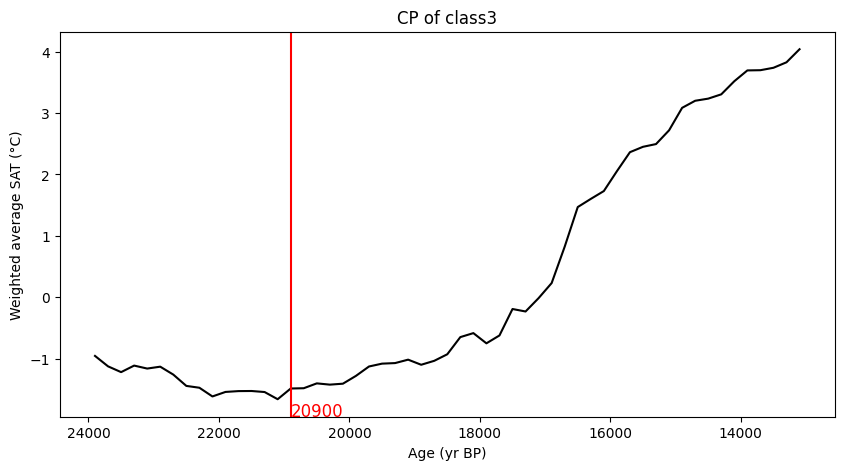

In [16]:
from toolbox import change_point_functions as cpf
unsorted_cp={}
for i in range(len(uncor_weighted_avg)):
    cp_climo_info=cpf.find_cp(uncor_weighted_avg[i], ds_GMM_climo['age'].values, avg_plot=True, avg_plot_title=f'CP of class{i}')
    unsorted_cp[i]=cp_climo_info['cp_age']


# Store the cp_climo_info

In [17]:
# save the 'cp_climo_info'
import pickle
pickle.dump(unsorted_cp, open('climo_ana_data/cp_climo_info.pkl', 'wb'))


In [18]:
# load the cp_climo_info
import pickle
unsorted_cp = pickle.load(open('climo_ana_data/cp_climo_info.pkl', 'rb'))

# Sort the class label according to the cps

In [19]:
from toolbox import change_point_functions as cpf
relabeled_cp, match = cpf.sort_classes_by_cp_age(unsorted_cp)
print("Relabeled Classes:", relabeled_cp)
print("Match Between Unsorted and Sorted Classes:", match)

Relabeled Classes: {0: 20900.0, 1: 17100.0, 2: 16900.0, 3: 16900.0}
Match Between Unsorted and Sorted Classes: {3: 0, 0: 1, 1: 2, 2: 3}


# Relabel the class_label

In [20]:
import numpy as np

ds_GMM_climo_relabeled = ds_GMM_climo.copy()

# Convert the class_label data into a numpy array to work with it directly
original_class_labels = ds_GMM_climo['class_label'].values

# Create a new array for relabeled class labels based on the match dictionary
relabeled_class_labels = np.vectorize(match.get)(original_class_labels)

# Add the new relabeled class labels as a data variable to the dataset
ds_GMM_climo_relabeled['class_relabeled'] = (('lat', 'lon'), relabeled_class_labels)

In [21]:
ds_GMM_climo_relabeled

<xarray.Dataset>
Dimensions:                (age: 65, lat: 96, lon: 144)
Coordinates:
  * lat                    (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon                    (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * age                    (age) float32 1.11e+04 1.13e+04 ... 2.37e+04 2.39e+04
Data variables:
    sat                    (age, lat, lon) float32 ...
    sat_std                (age, lat, lon) float32 ...
    sat_centered           (age, lat, lon) float32 ...
    weight                 (lat) float32 ...
    sat_centered_weighted  (age, lat, lon) float32 ...
    class_label            (lat, lon) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    class_relabeled        (lat, lon) int32 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2

In [22]:
# store the ds_GMM_climo_relabeled
ds_GMM_climo_relabeled['lat'].encoding['missing_value'] = np.nan
ds_GMM_climo_relabeled['lon'].encoding['missing_value'] = np.nan
ds_GMM_climo_relabeled.to_netcdf('climo_ana_data/ds_GMM_climo_relabeled.nc')

In [23]:
# load the ds_GMM_climo_relabeled
import xarray as xr
ds_GMM_climo_relabeled = xr.open_dataset('climo_ana_data/ds_GMM_climo_relabeled.nc')

# Plot the spatial distribution of labels

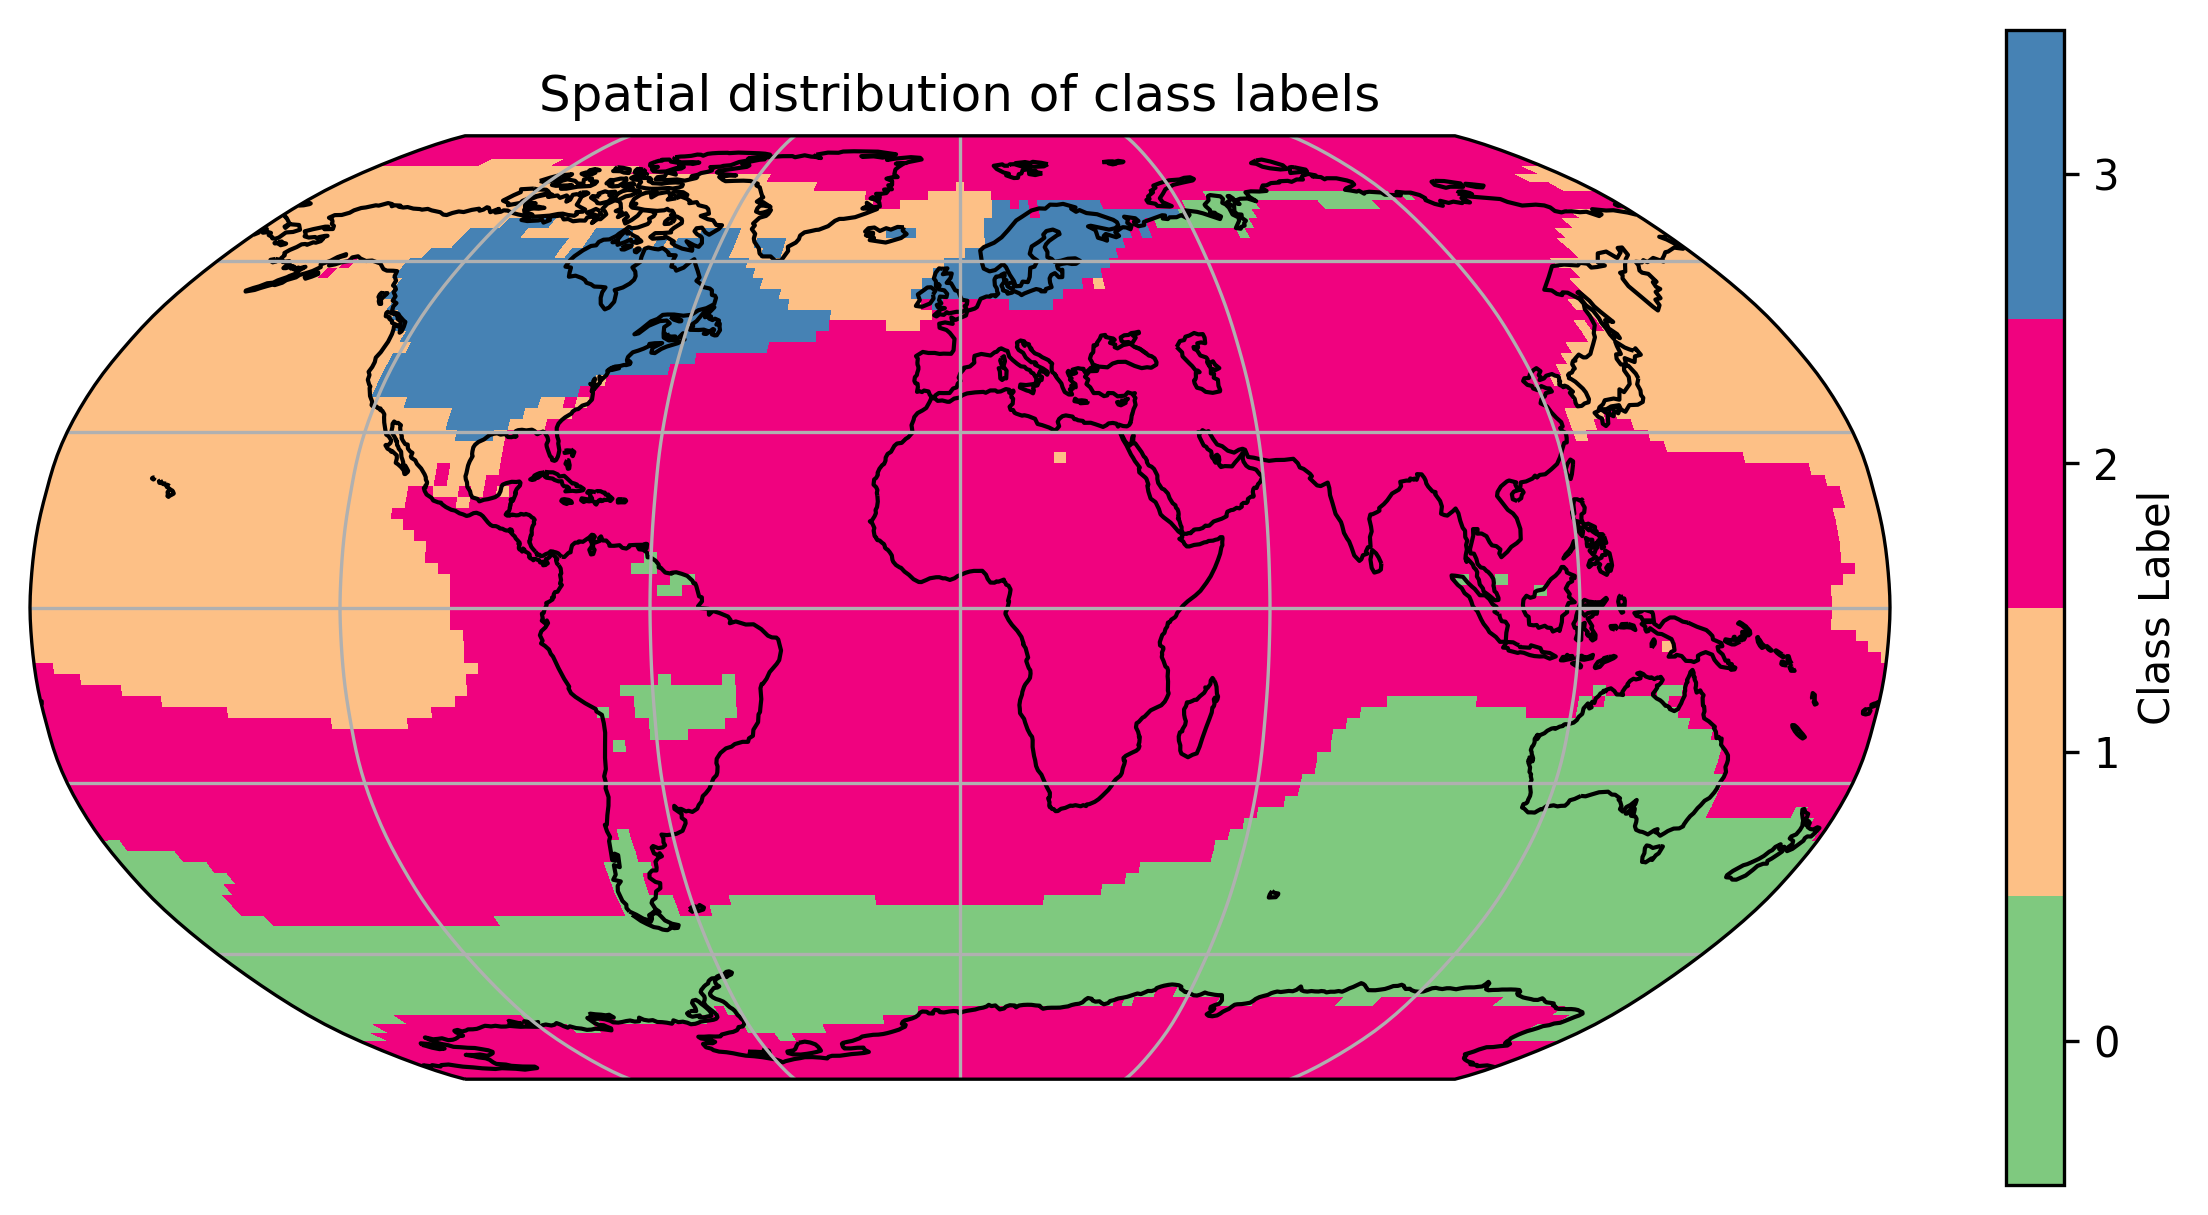

In [24]:

from toolbox import GMM_functions as gf
gf.plot_labels(ds_GMM_climo_relabeled,label_var_name='class_relabeled')
# gf.plot_labels(ds_GMM_climo_relabeled,label_var_name='class_label')

# Plot average curves

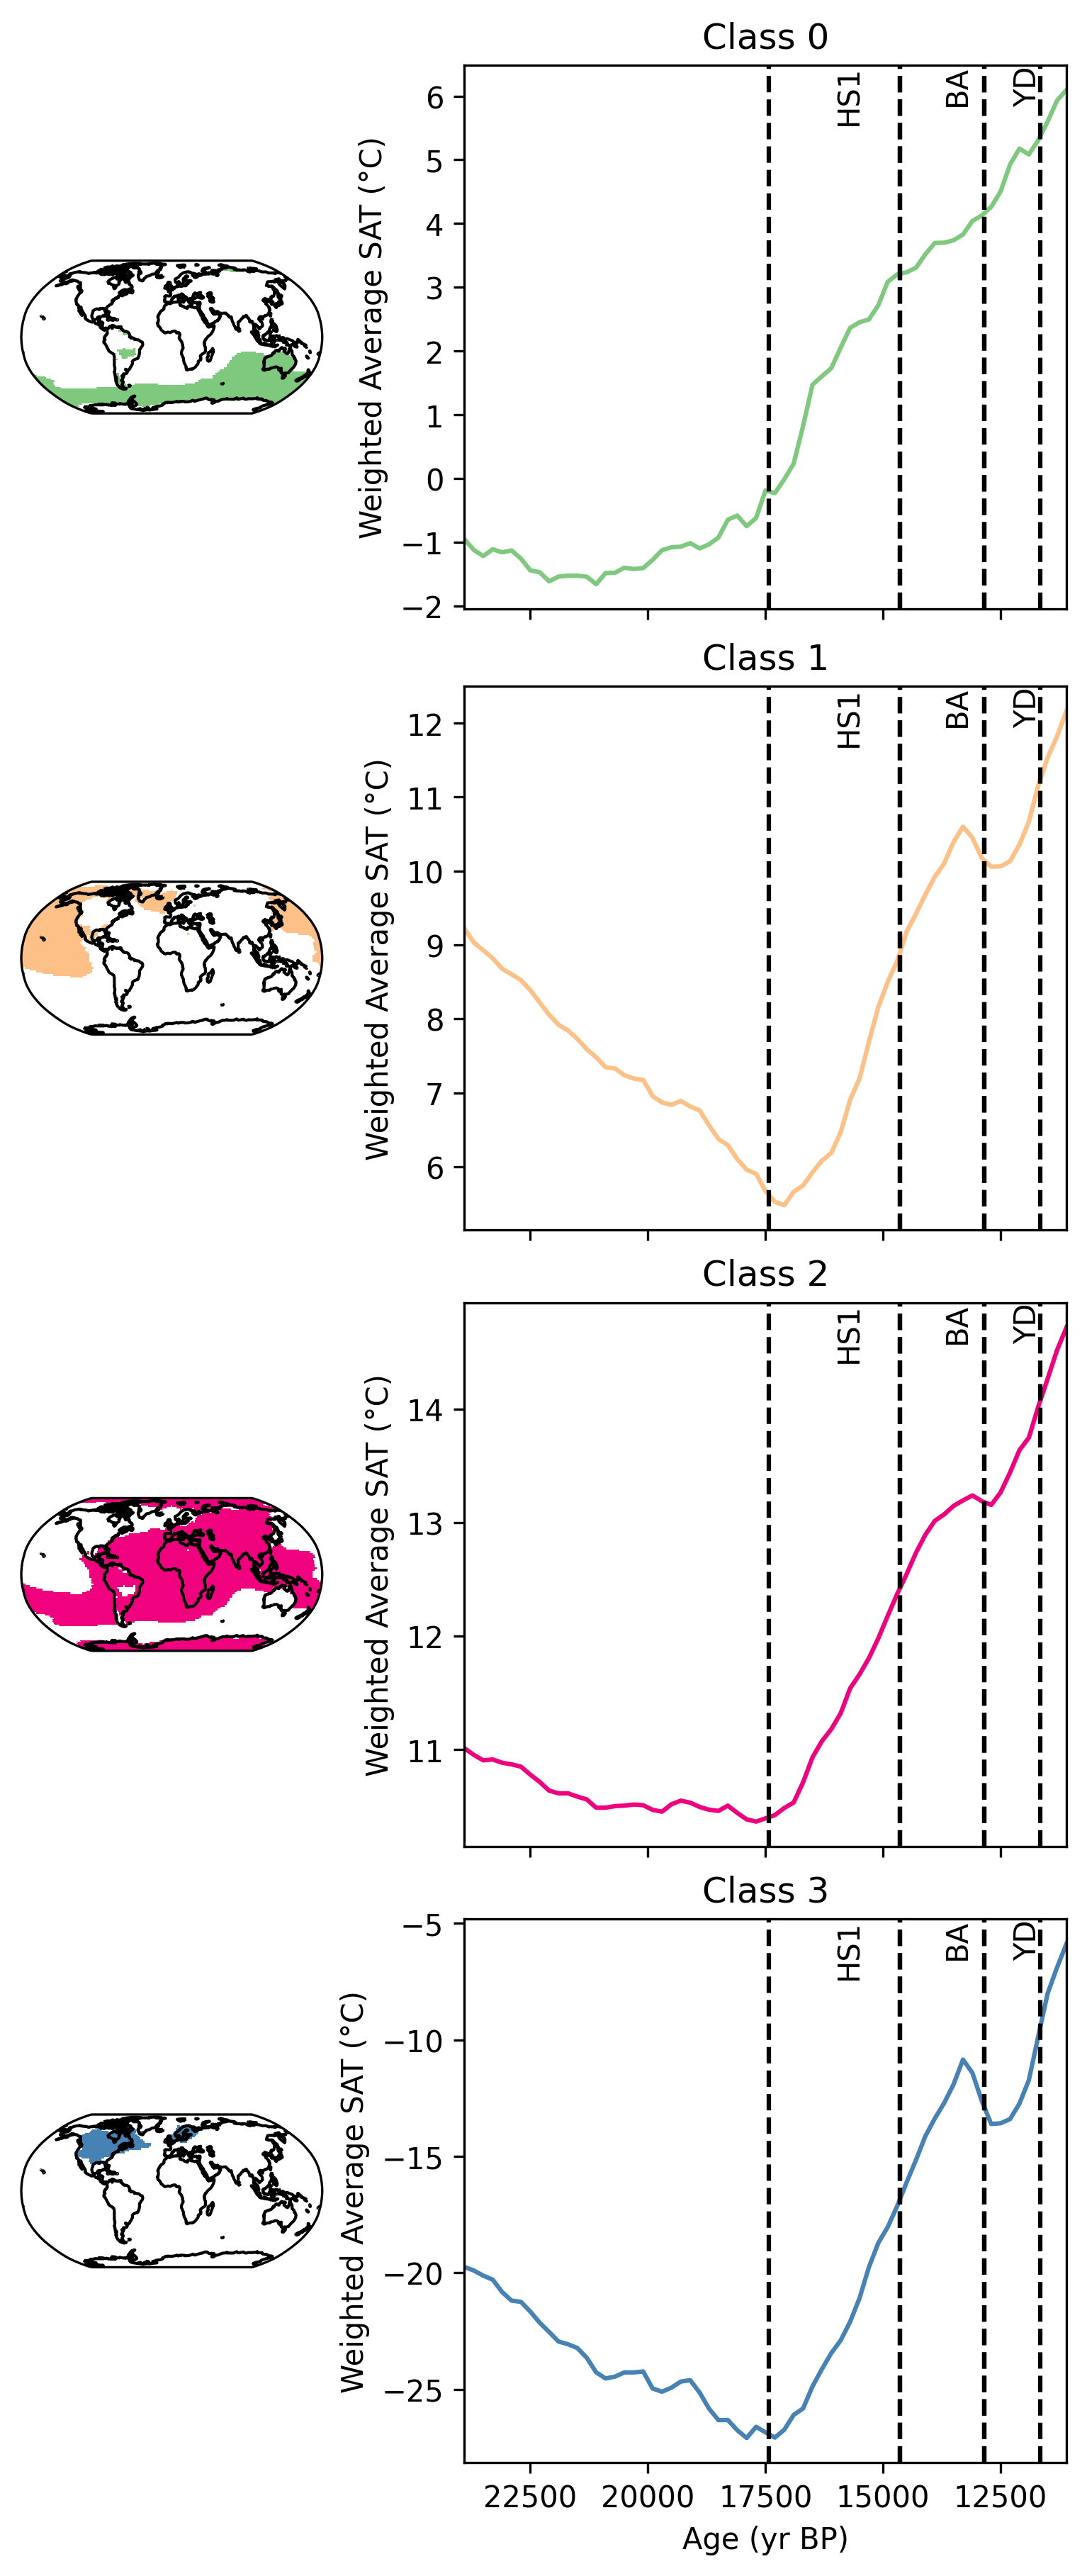

In [25]:
from toolbox import GMM_functions as gfs
uncor_weighted_avg=gfs.plot_weighted_average_curve(ds_GMM_climo_relabeled.copy(),label_var_name='class_relabeled', dpi=300)

# Relabel the average curves

In [26]:
from toolbox import change_point_functions as cpf
ds_GMM_climo_relabeled=cpf.cal_anomalies(ds_GMM_climo_relabeled,2000)

relabeled_weighted_avg = {}
for i in range(4):
    relabeled_weighted_avg[i] = cpf.cal_weighted_average_curve(ds_GMM_climo_relabeled, i, sat_var_name='sat_anomalies',class_label_name='class_relabeled')

In [28]:
# save the relabeled_weighted_avg
import pickle
pickle.dump(relabeled_weighted_avg, open('climo_ana_data/relabeled_weighted_avg.pkl', 'wb'))


In [29]:
# read the relabeled_weighted_avg
import pickle
relabeled_weighted_avg = pickle.load(open('climo_ana_data/relabeled_weighted_avg.pkl', 'rb'))

-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 28. 32. 37. 45.]
selected_cp_index: 0
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [16. 23. 34. 40. 48.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [16. 29. 35. 51.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 43. 49.]
selected_cp_index: 2


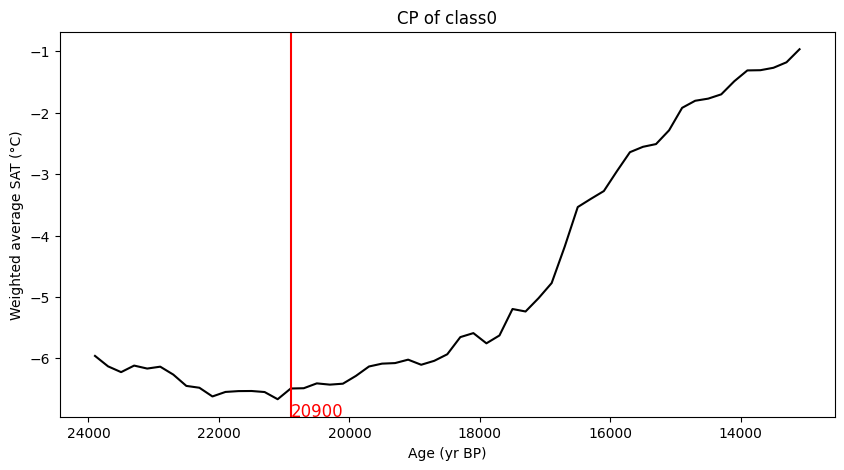

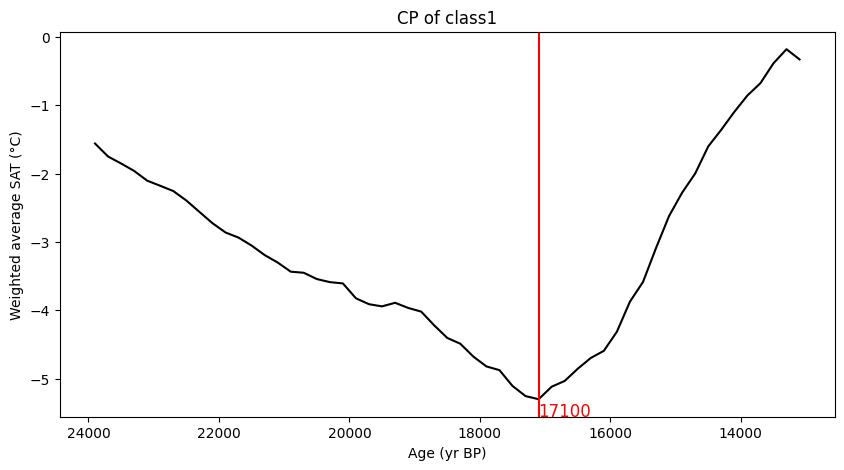

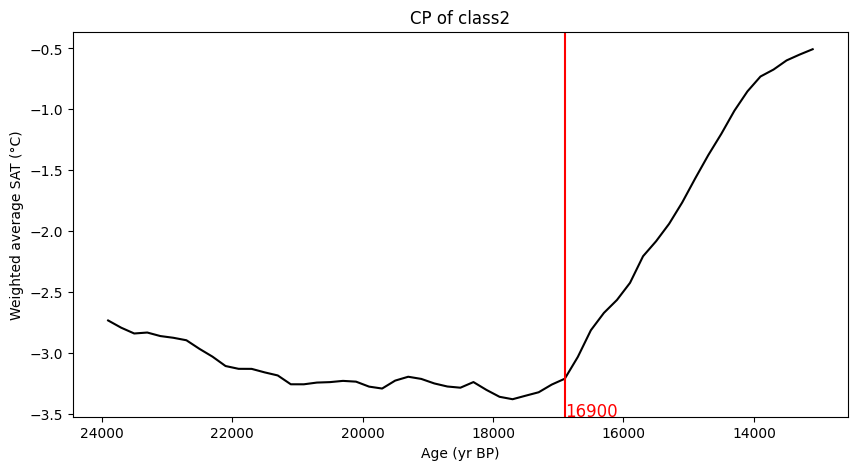

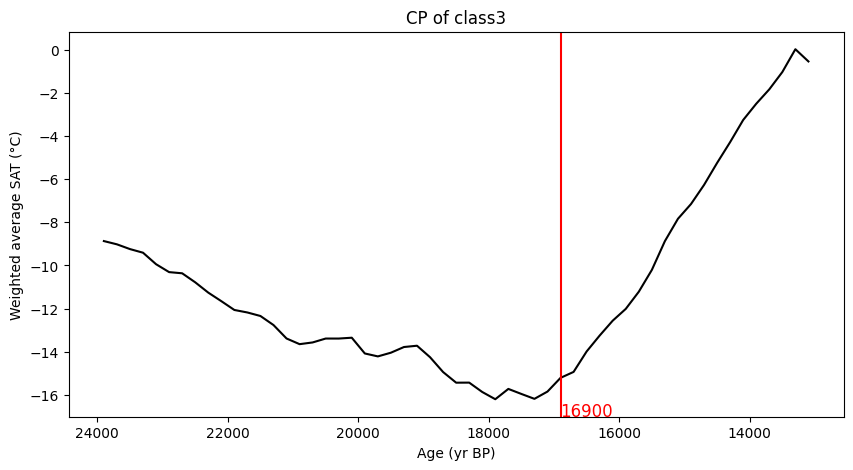

In [27]:
from toolbox import change_point_functions as cpf

for i in range(len(relabeled_weighted_avg)):
    cp_climo_info_relabeled=cpf.find_cp(relabeled_weighted_avg[i], ds_GMM_climo_relabeled['age'].values, avg_plot=True, avg_plot_title=f'CP of class{i}')

# GMM on the sklearn PCA results

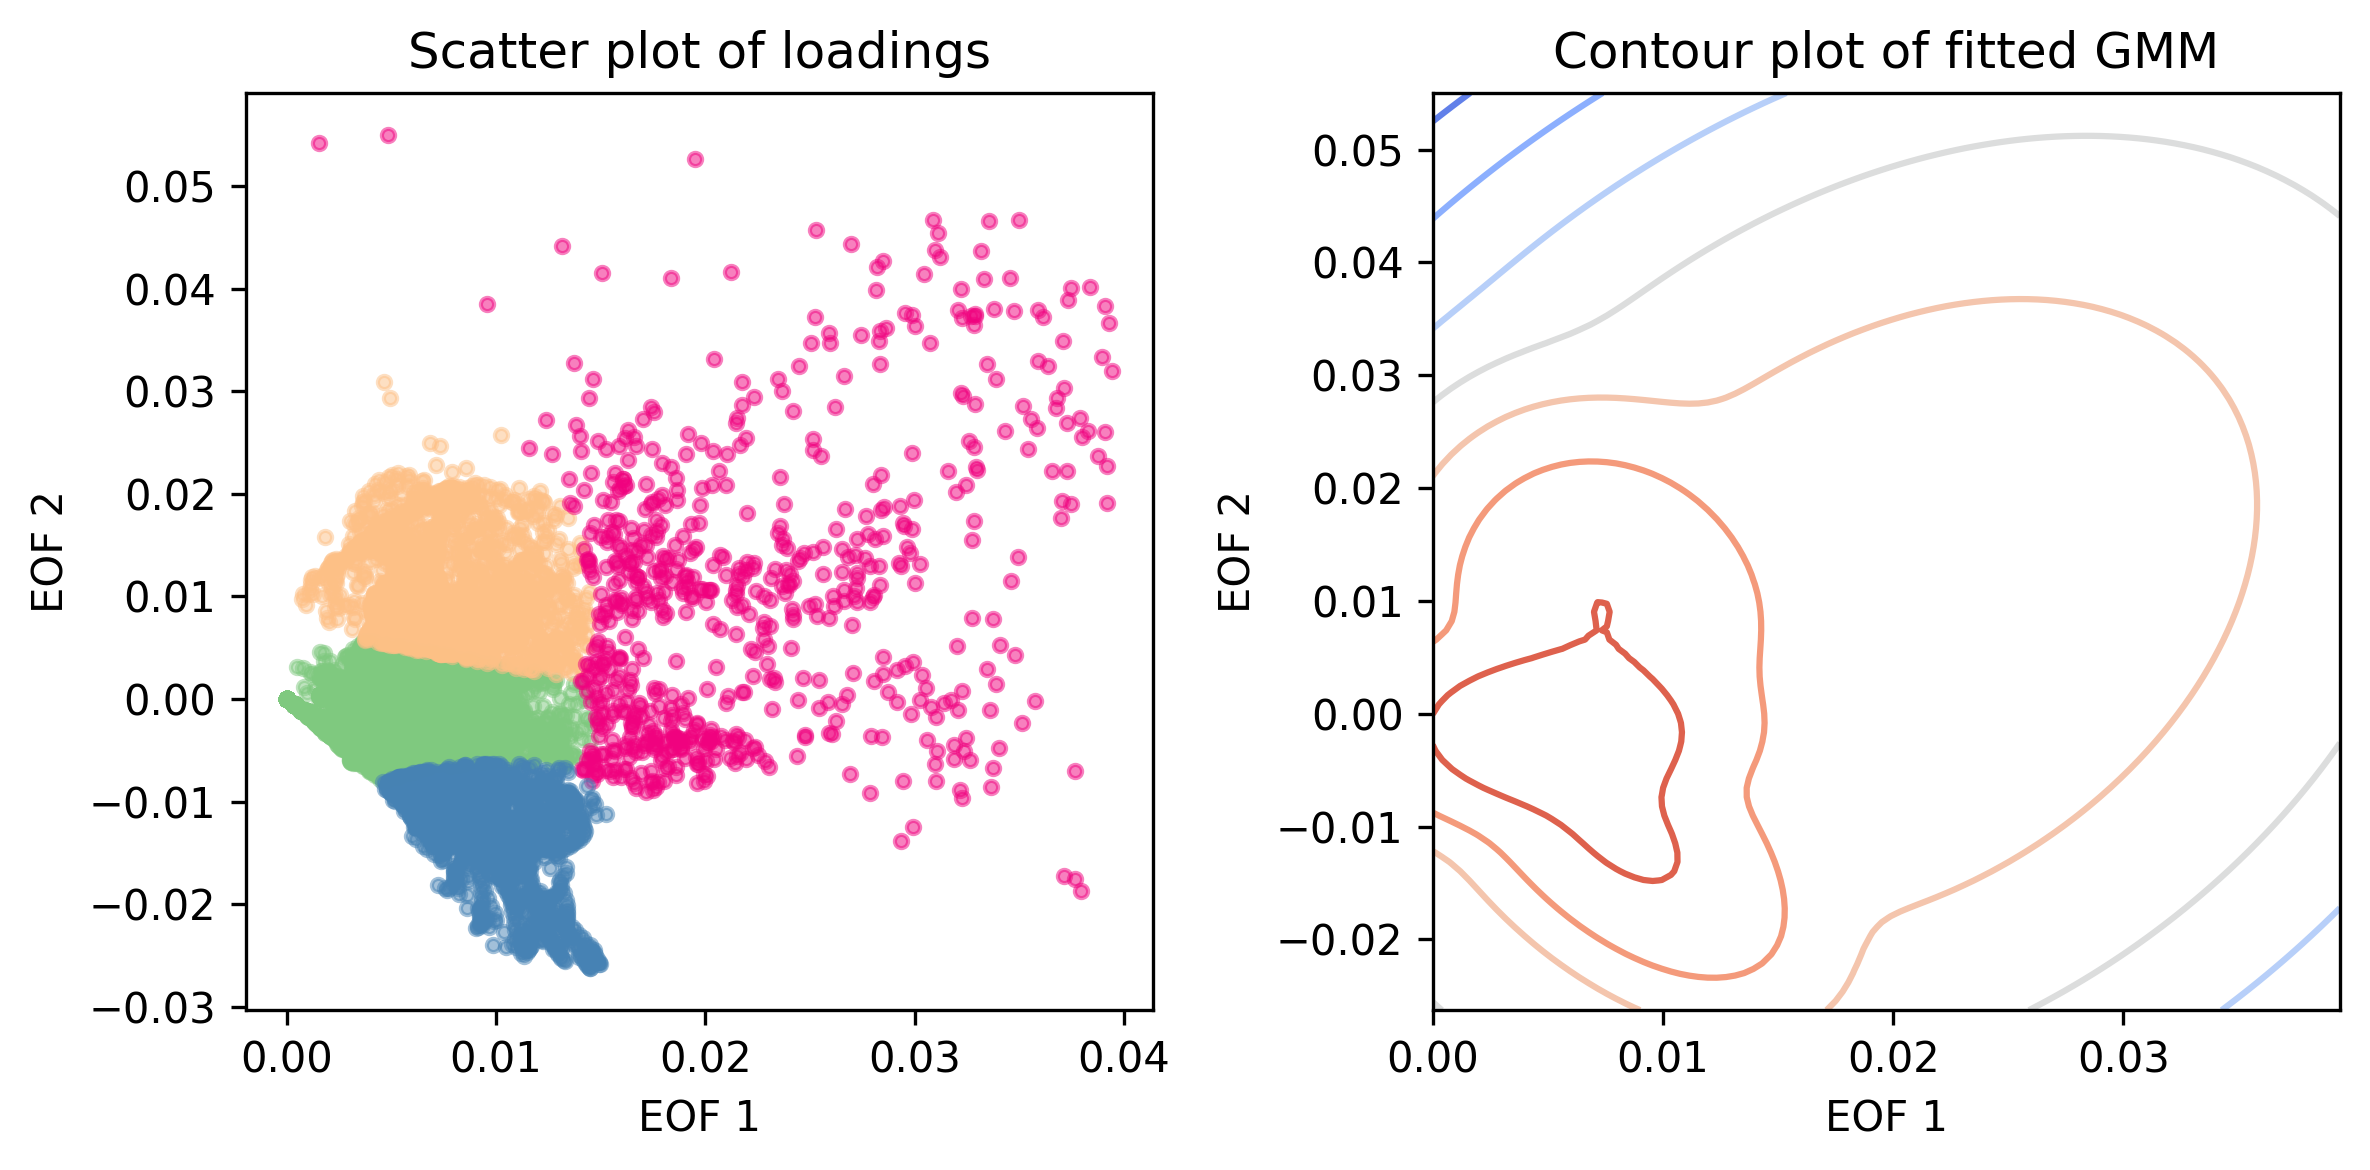

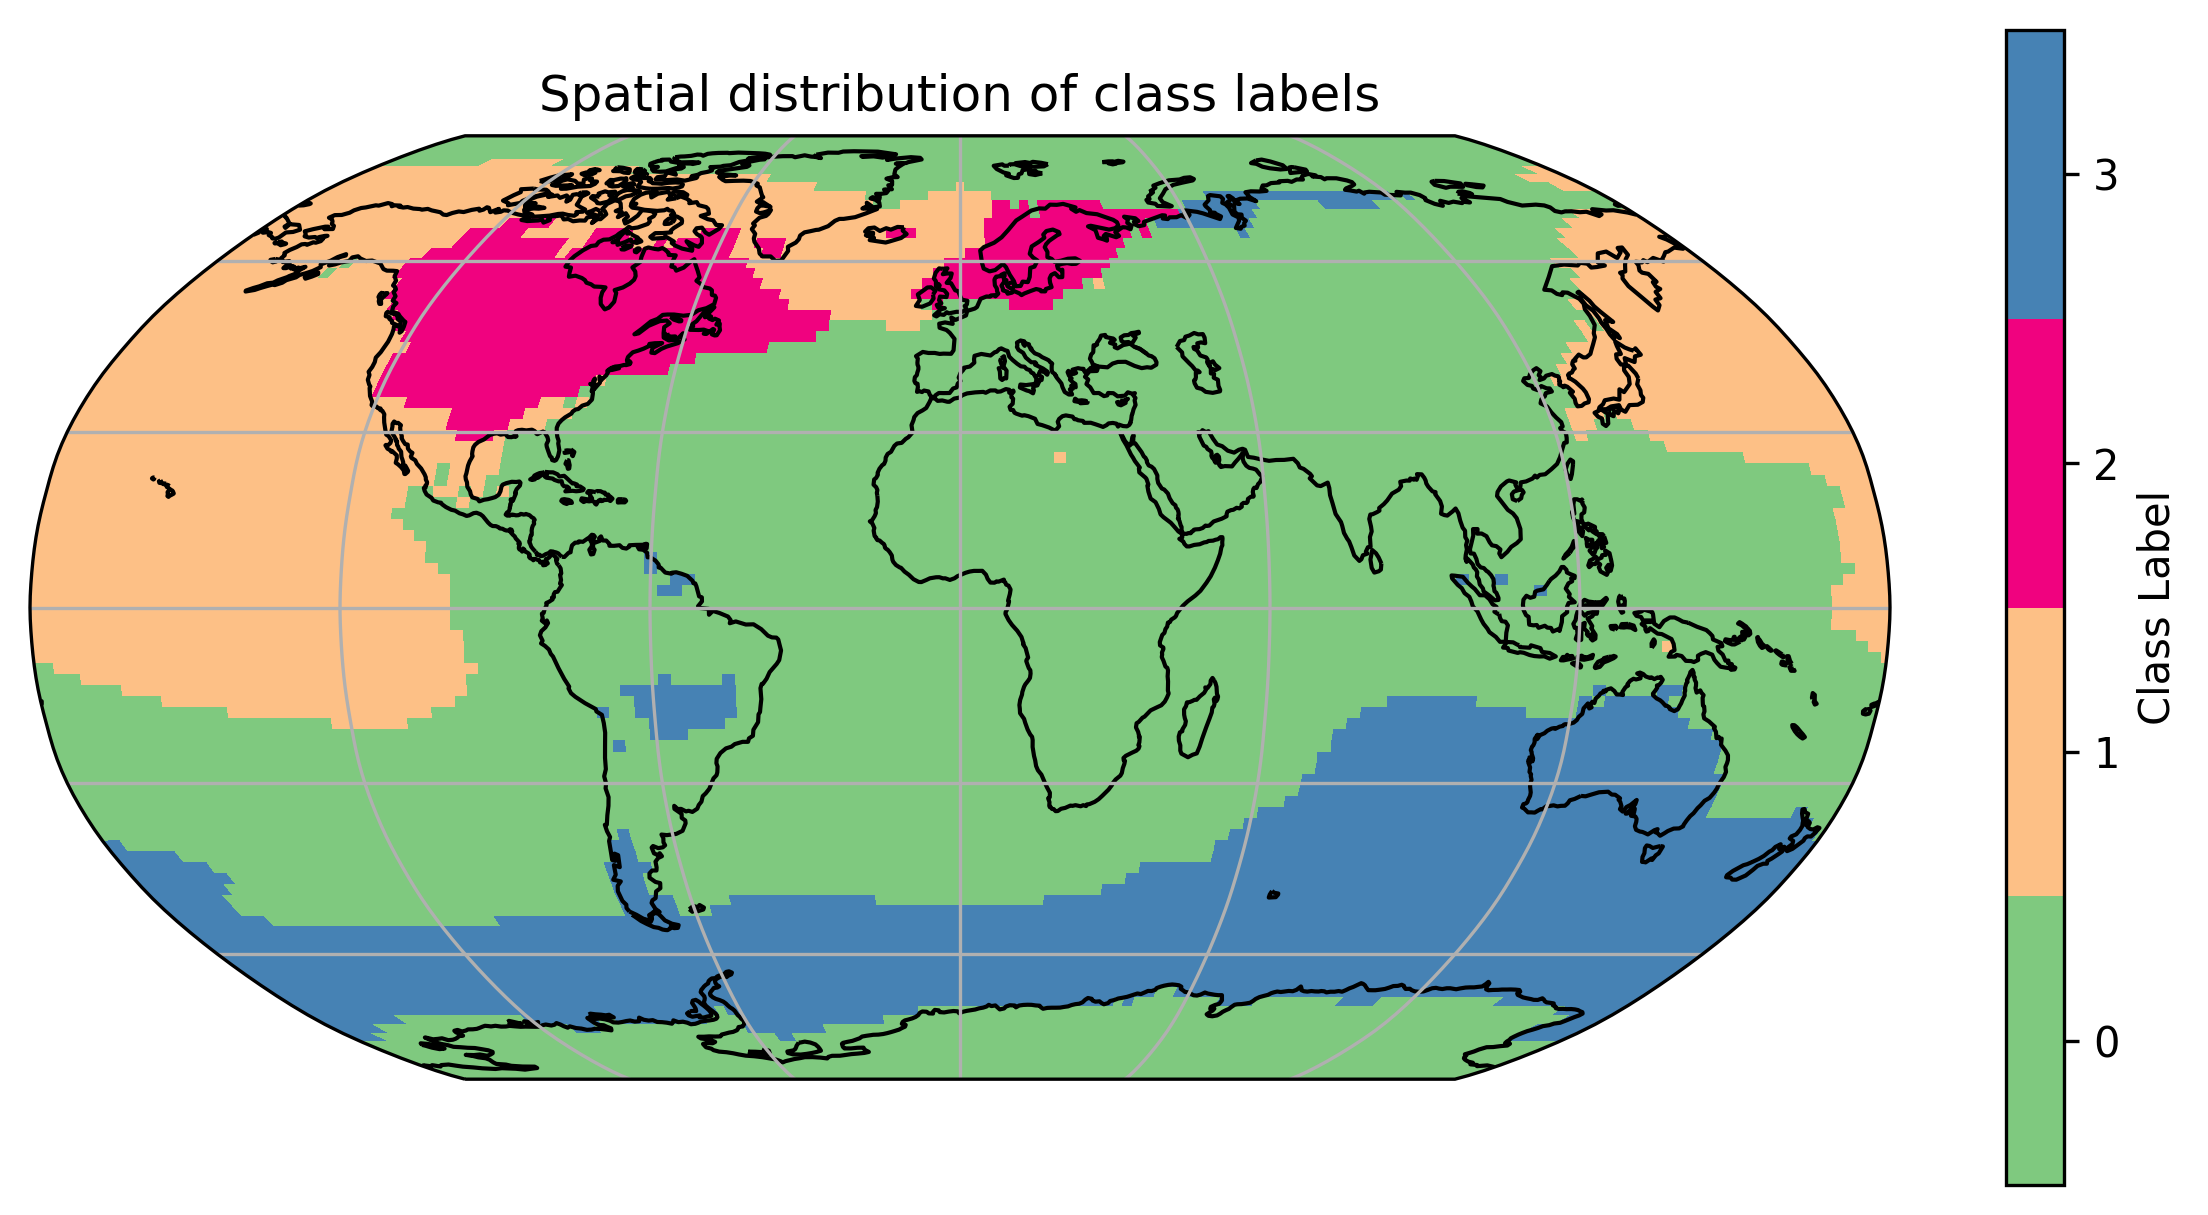

In [31]:
from toolbox import GMM_functions as gf
ds_EOFs_GMM=gf.GMM4EOFS(eofs_climo_sk, ds_sat,n_components=4)
gf.plot_labels(ds_EOFs_GMM)